# Methodology

The approach we adopted for the analysis of this dataset follows a standard methodology used by machine learning scientist. We first begin by looking at the data, from a descriptive statistics perspective, then we try to visialize the dataset in order to have a general idea.

In order to apply any machine learning algorithm, we need to transform the data into a format that will minimize the error propagation due to the difference in the way different features were measured and reported. We apply several techniques like rescaling and normalization. This step is necessary to make sure our odels are accurate and generalizable.

We then need to take a look at our features one by one. We need to know what feature combination impact the most the performance of our models. TO do that, several techniques for feature selection exist, and we will apply some of them to our dataset in order to pick the most important ones to use in our models.

We will mainly be doing classification in this dataset, but we might do some regression as well. We will be applying different approaches to our data and measure the accuracy of our models to pick the winning solution.

The general approach in this notebook is summarized in the figure below:

![approach](./images/approach.png)  


After looking at the data sent by Kollmann's lab members, I decided to go with the vertical dataset for the reasons below :

- The horizontal dataset represents data points per mouse (rows) and visits (columns). THis is an interesting view of the experiment and the most obvious way to describe the visits and the observations, unfortunately, reducing the number of instances (rows) to a row per mouse, reduces the size of the dataset to be used by some classification algorithm, which will lead to models that are not generalizable
- Some data points were not entered and are missing. Usually when these missing values are rare in a dataset, one common approach will be the imputation of the missing values by using the average or the median values. But if these missing values are a big part of the dataset, the best approach to deal with them is to simply remove all the rows containing missing data. With the horizontal data set we might end up removing a lot of data which doesn't help.
- Assuming all visits in the vertical dataset are independent (which is not necessarily true), we can have a dataset with a decent size that can be used to split the dataset later into training/testing/validation datasets, or to do k-fold cross validation on some classification tasks

# Analysis Environment 

This analysis was done using open source tools mainly.

- [Python Anaconda](https://www.continuum.io/downloads)
- [Jupyter Notebook](http://jupyter.org/)

I also used [Tableau free edition](http://www.tableau.com/) for some visualizations.

# Vertical Dataset No BCG (all time points)

## Understand the data : Descriptive Statistics

Let's start first by importing all libraries we need for the analysis, for reading the files, creating plots, performaing machine learning data analysis etc ..

In [1]:
%matplotlib inline
# Load libraries
import numpy as np
from numpy import arange
from numpy import set_printoptions
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
from pandas import set_option
from pandas.tools.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from string import letters
from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import r2_score
from collections import defaultdict
import pprint

sns.set(style="white")
plt.rcParams['figure.figsize'] = (20.0, 10.0)


/Users/Rad/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/Rad/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


We start by loading the dataset into a **pandas dataframe**. This is the most efficient way to manipulate and transform the data 

In [2]:
# Load the data set into a dataframe
df = pd.read_csv('../data/excel_updates_danny/cs.mortality.vertical.full.nobcg.leftvright.matrix.csv')


In [3]:
# Print dataset
df.shape

(585, 44)

We have a dataset with 585 instances and 44 features
Let's take a look at the types of each attribute

In [4]:
# Print data types for attributes

pd.set_option('display.max_rows', 600)
df.dtypes

pupID                                          object
litter                                          int64
sex                                            object
outcome                                        object
challenge.time                                 object
weight.challenge                              float64
weight                                        float64
ch.weight                                     float64
pch.weight                                    float64
time                                           object
hr.post.challenge                             float64
visit                                          object
score.overall                                  object
score.left                                     object
score.right                                    object
rights.mobile.overall                           int64
rights.shakey.overall                           int64
rights.lethargic.overall                        int64
rights.nonmobile.overall    

Let's take a look at the 20 first rows of the dataset

In [5]:
#print first 20 rows
df.head(20)

,pupID,litter,sex,outcome,challenge.time,weight.challenge,weight,ch.weight,pch.weight,time,...,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,fail_to_right.mobile.hips.right,fail_to_right.lethargic.hips.right,fail_to_right.lethargic.two.visits.right,fail_to_right.nonmobile.hips.right,obs.found.dead,observations
0,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5,2015.07.31_F1_M7 (M)_saline_old.0.8,1,M,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
6,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
9,2015.07.31_F1_M8 (F)_saline_old.0.8,1,F,live,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


As we can see a lot of data is missing, we will deal with this later in our analysis
For now let's summarize the distribution of each attribute, not all of this is informative, as some text data is transformed automatically into numerical data, but we are more interested in the distribution of the attributes (features)

In [6]:
pd.set_option('precision', 3)
df.describe()

/Users/Rad/anaconda2/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,litter,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,rights.mobile.overall,rights.shakey.overall,rights.lethargic.overall,rights.nonmobile.overall,...,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,fail_to_right.mobile.hips.right,fail_to_right.lethargic.hips.right,fail_to_right.lethargic.two.visits.right,fail_to_right.nonmobile.hips.right,obs.found.dead
count,585.000,553.000,406.000,406.000,406.000,585.000,585.000,585.000,585.000,585.000,...,532.000,532.000,532.000,532.000,532.000,532.000,532.000,532.000,532.000,585.000
mean,11.191,4.302,4.123,-0.053,-0.829,33.096,0.256,0.099,0.229,0.051,...,0.244,0.117,0.250,0.086,0.064,0.107,0.085,0.011,0.060,0.034
std,6.634,0.748,0.690,0.352,8.527,20.112,0.437,0.299,0.421,0.221,...,0.430,0.321,0.433,0.281,0.245,0.310,0.279,0.106,0.238,0.182
min,1.000,2.510,2.430,-1.960,-35.701,12.083,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,4.000,NaN,NaN,NaN,NaN,18.167,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
50%,12.000,NaN,NaN,NaN,NaN,25.333,0.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
75%,17.000,NaN,NaN,NaN,NaN,42.417,1.000,0.000,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000
max,25.000,5.930,5.930,0.890,32.271,96.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


The most important thing we want to see here prior to starting any analysis is how balanced this dataset is, so we will try to take a look at the dsitribution of the outcome, which is the class we want to predict with the score

In [7]:
# class distribution
df.groupby('outcome').size()

outcome
die           160
found.dead     93
live          332
dtype: int64

As we can see the class `live` is higher than the two other, but when we merge `found.dead` with `die` we can have a dataset that is more or less balanced. That said this is a general observation, things can change later when we transform the data.

## Understand the data : Visualization

### Unimodal Data Visualization

Let's look at how the data looks like before any transformation. It is always useful to lok how different attributes are distributed. 

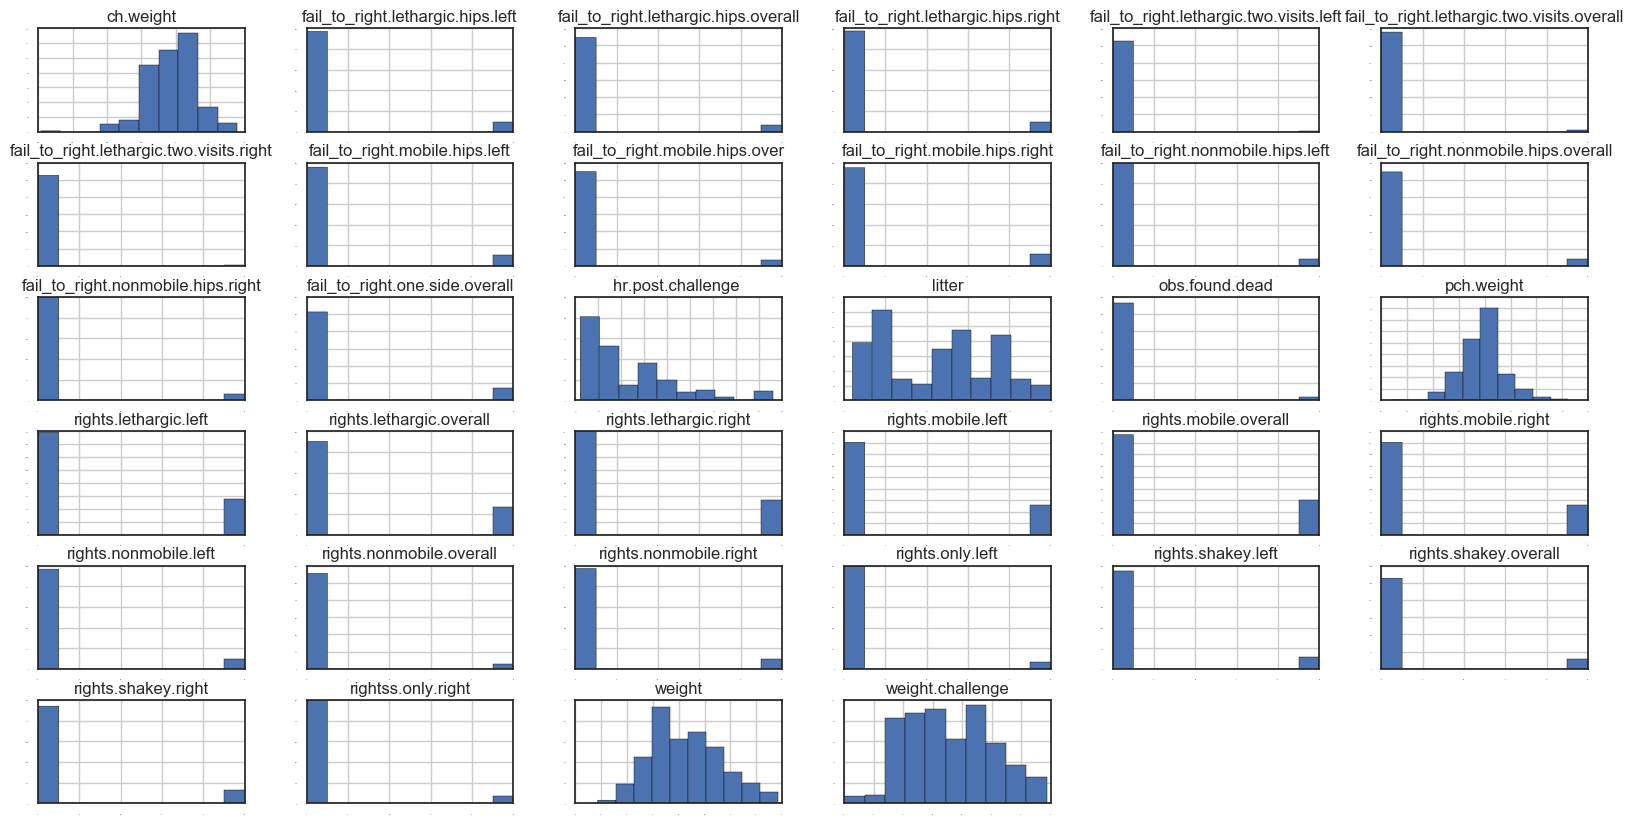

In [8]:
# histograms
df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1)
plt.show()

Because we have a lot of features that are 0/1 we don't get much out of this plot, except that all features/attributes related to `weight` seem to have a gaussian like distribution

### Multimodal Data Visualization

Let's see if we have attributes that correlate

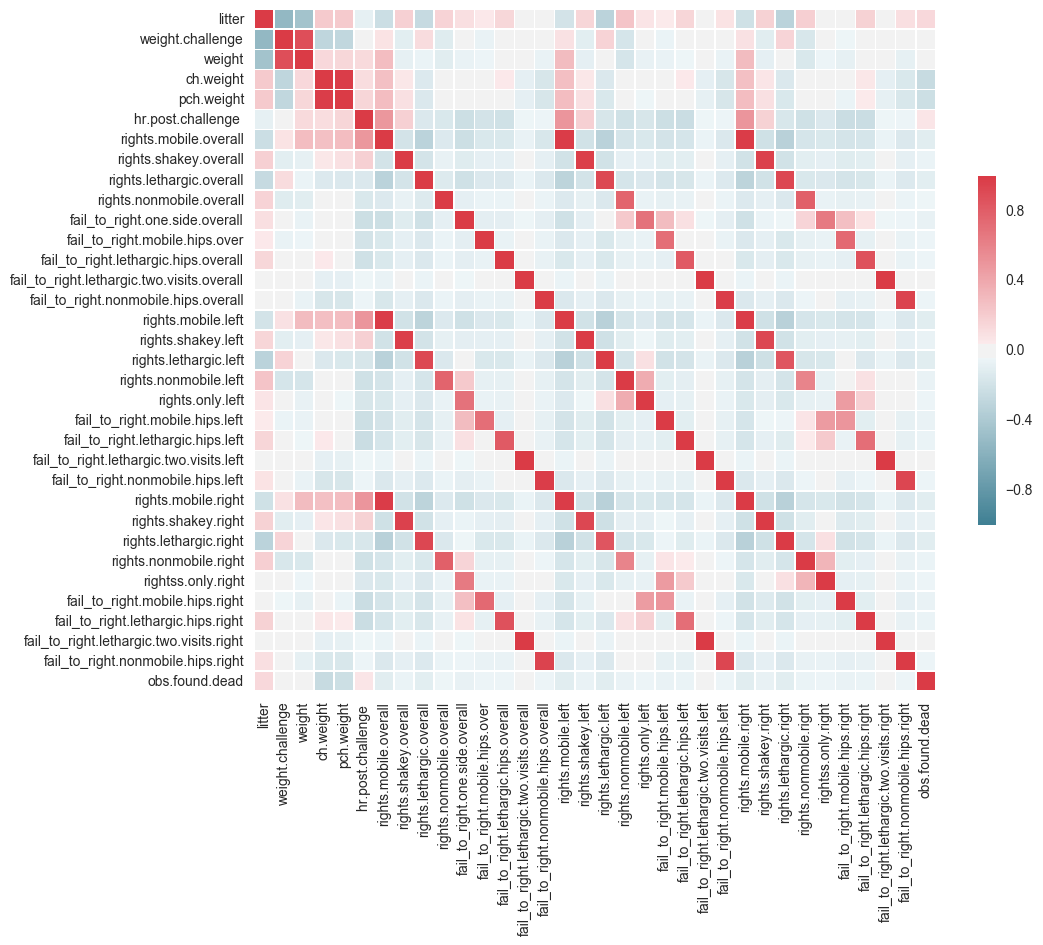

In [9]:
correlations = df.corr(method='pearson')
correlations

# Plot Correlations
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

As we can see we have a lot of diagonals in this dataset, which means not all these features are going to be included in the dataset as we have a lot of correlations

We can already spot some positive correlation between the weight and the hours post challenges even if it is a slightly positive (not a strong correlation judging by the colors).

The top left corner seems to have some useful information

Not all the algorithms deal with correlated features equally. Some algorithms like Naive Bayes assumes attributes independence, so it may behaves in an unexpected way, some other approaches like Support Vector Machines care about it much less.

One thing we can do here, is to take the decision to reduce the number of attributes by doing a **Principal Component Aanalysis**, squeezing features that are part of the same components, transform the original dataset and see what this will give us.

But first of all we will need to start doing some transformation to make sure we have all the features included, not only the numerical ones, so we will have to do some transformations.

Let's list all the features we have so far.


In [10]:
list(df)

['pupID',
 'litter',
 'sex',
 'outcome',
 'challenge.time',
 'weight.challenge',
 'weight',
 'ch.weight',
 'pch.weight',
 'time',
 'hr.post.challenge ',
 'visit',
 'score.overall',
 'score.left',
 'score.right',
 'rights.mobile.overall',
 'rights.shakey.overall',
 'rights.lethargic.overall',
 'rights.nonmobile.overall',
 'fail_to_right.one.side.overall',
 'fail_to_right.mobile.hips.over',
 'fail_to_right.lethargic.hips.overall',
 'fail_to_right.lethargic.two.visits.overall',
 'fail_to_right.nonmobile.hips.overall',
 'rights.mobile.left',
 'rights.shakey.left',
 'rights.lethargic.left',
 'rights.nonmobile.left',
 'rights.only.left',
 'fail_to_right.mobile.hips.left',
 'fail_to_right.lethargic.hips.left',
 'fail_to_right.lethargic.two.visits.left',
 'fail_to_right.nonmobile.hips.left',
 'rights.mobile.right',
 'rights.shakey.right',
 'rights.lethargic.right',
 'rights.nonmobile.right',
 'rightss.only.right',
 'fail_to_right.mobile.hips.right',
 'fail_to_right.lethargic.hips.right',
 'fai

The features that we need to transform to numerical ones are :
- sex
- outcome

The ones we will drop that are not useful here are 
- pupId
- Litter
- observations

In [11]:
df_clean = df.drop(['litter', 'pupID', 'visit', 'observations'], axis=1)

Let's now merge the **outcome** values corresponding to `die` and `found dead` to make a binary classification instead of having three classes

In [12]:
df_clean.outcome = df_clean.outcome.str.replace("found.dead","die")
df_clean.groupby('outcome').size()

outcome
die     253
live    332
dtype: int64

Now we need to codigy the classes `live` and `die` with `0` and `1`

In [13]:
# Verify code for the outcome
zip(df_clean.outcome, pd.factorize(df_clean.outcome)[0])

[('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('die', 1),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('live', 0),
 ('die', 1),
 ('die', 1),


In [14]:
transformed_outcome = pd.factorize(df_clean.outcome)
df_clean['outcome'] = transformed_outcome[0].astype(float)

Now we will do the same with `sex` attribute

In [15]:
zip(df_clean.sex, pd.factorize(df_clean.sex)[0])
transformed_sex = pd.factorize(df_clean.sex)
df_clean['sex'] = transformed_sex[0].astype(float)

Our next cleanup procedure will be to get rid of all NaN values (rows)


Now let's remove the time related attributes as we are not doing any time series analysis here

In [16]:
df_clean = df_clean.drop(['challenge.time', 'time'], axis=1)

In [17]:
df_clean.shape

(585, 38)

Three columns remain having `string` values while a number is expected, we will fix that by changing `FD == Found Dead` values into `0`

In [18]:
df_clean['score.left'] = df_clean['score.left'].str.replace("FD","0").astype(float)   

In [19]:
df_clean['score.right'] = df_clean['score.right'].str.replace("FD","0").astype(float)
df_clean['score.overall'] = df_clean['score.overall'].str.replace("FD","0").astype(float)


In [20]:
df_clean['score.left']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
30     NaN
31     NaN
32     0.0
33     1.0
34     2.0
35     6.0
36     6.0
37     6.0
38     6.0
39     0.0
40     3.0
41     3.0
42     0.0
43     6.0
44     8.0
45     8.0
46     6.0
47     6.0
48     6.0
49     6.0
50     6.0
51     6.0
52     8.0
53     8.0
54     8.0
55     8.0
56     0.0
57     6.0
58     3.0
59     6.0
60     6.0
61     8.0
62     6.0
63     6.0
64     6.0
65     6.0
66     6.0
67     8.0
68     8.0
69     8.0
70     8.0
71     8.0
72     0.0
73     6.0
74     6.0
75     6.0
76     6.0
77     8.0
78     2.0
79     6.0
80     6.0
81     6.0
82     6.0
83     6.0
84     8.0
85     8.0
86     8.0
87     8.0
88     6.0
89     6.0
90     6.0

In [21]:
fill_NaN = Imputer(missing_values=np.nan, strategy='mean', axis=1)
imputed_DF = pd.DataFrame(fill_NaN.fit_transform(df_clean))
imputed_DF.columns = df_clean.columns
imputed_DF.index = df_clean.index

In [22]:
imputed_DF.head()

,sex,outcome,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,score.overall,score.left,score.right,...,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,fail_to_right.mobile.hips.right,fail_to_right.lethargic.hips.right,fail_to_right.lethargic.two.visits.right,fail_to_right.nonmobile.hips.right,obs.found.dead
0,0.0,0.0,1.536,1.536,1.536,1.536,14.500,6.0,1.536,1.536,...,1.536,1.536,1.536,1.536,1.536,1.536,1.536,1.536,1.536,0.0
1,0.0,0.0,1.869,1.869,1.869,1.869,19.167,6.0,1.869,1.869,...,1.869,1.869,1.869,1.869,1.869,1.869,1.869,1.869,1.869,0.0
2,0.0,0.0,2.393,2.393,2.393,2.393,24.500,8.0,2.393,2.393,...,2.393,2.393,2.393,2.393,2.393,2.393,2.393,2.393,2.393,0.0
3,0.0,0.0,2.714,2.714,2.714,2.714,29.000,8.0,2.714,2.714,...,2.714,2.714,2.714,2.714,2.714,2.714,2.714,2.714,2.714,0.0
4,0.0,0.0,3.964,3.964,3.964,3.964,46.500,8.0,3.964,3.964,...,3.964,3.964,3.964,3.964,3.964,3.964,3.964,3.964,3.964,0.0


In [23]:
df_clean.head()

,sex,outcome,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,score.overall,score.left,score.right,...,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,fail_to_right.mobile.hips.right,fail_to_right.lethargic.hips.right,fail_to_right.lethargic.two.visits.right,fail_to_right.nonmobile.hips.right,obs.found.dead
0,0.0,0.0,NaN,NaN,NaN,NaN,14.500,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,0.0,0.0,NaN,NaN,NaN,NaN,19.167,6.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,0.0,0.0,NaN,NaN,NaN,NaN,24.500,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,0.0,0.0,NaN,NaN,NaN,NaN,29.000,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,0.0,0.0,NaN,NaN,NaN,NaN,46.500,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [24]:
#df_clean_no_nas = df_clean.dropna()
#0df_clean_no_nas.head()
df_clean_2 = imputed_DF

Now let's see the size of our dataset again and the new class distribution 

In [25]:
df_clean_2.shape

(585, 38)

In [26]:
df_clean_2.groupby('outcome').size()

outcome
0.0    332
1.0    253
dtype: int64

Now let's drop the outcome column as we will not be counting it as feature

In [27]:
df_final = df_clean_2.drop(['outcome', 'obs.found.dead'], axis=1)

In [28]:
#df_scaled = preprocessing.scale(df_final)
scaler = Normalizer().fit(df_final)
normalized_df = scaler.transform(df_final)

In [29]:
df_scaled_df = pd.DataFrame(normalized_df, columns = df_final.columns)

In [30]:
df_scaled_df.head()

,sex,weight.challenge,weight,ch.weight,pch.weight,hr.post.challenge,score.overall,score.left,score.right,rights.mobile.overall,...,fail_to_right.nonmobile.hips.left,rights.mobile.right,rights.shakey.right,rights.lethargic.right,rights.nonmobile.right,rightss.only.right,fail_to_right.mobile.hips.right,fail_to_right.lethargic.hips.right,fail_to_right.lethargic.two.visits.right,fail_to_right.nonmobile.hips.right
0,0.0,0.088,0.088,0.088,0.088,0.832,0.344,0.088,0.088,0.000,...,0.088,0.088,0.088,0.088,0.088,0.088,0.088,0.088,0.088,0.088
1,0.0,0.085,0.085,0.085,0.085,0.867,0.272,0.085,0.085,0.000,...,0.085,0.085,0.085,0.085,0.085,0.085,0.085,0.085,0.085,0.085
2,0.0,0.084,0.084,0.084,0.084,0.865,0.282,0.084,0.084,0.035,...,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084,0.084
3,0.0,0.082,0.082,0.082,0.082,0.881,0.243,0.082,0.082,0.030,...,0.082,0.082,0.082,0.082,0.082,0.082,0.082,0.082,0.082,0.082
4,0.0,0.078,0.078,0.078,0.078,0.911,0.157,0.078,0.078,0.020,...,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078,0.078


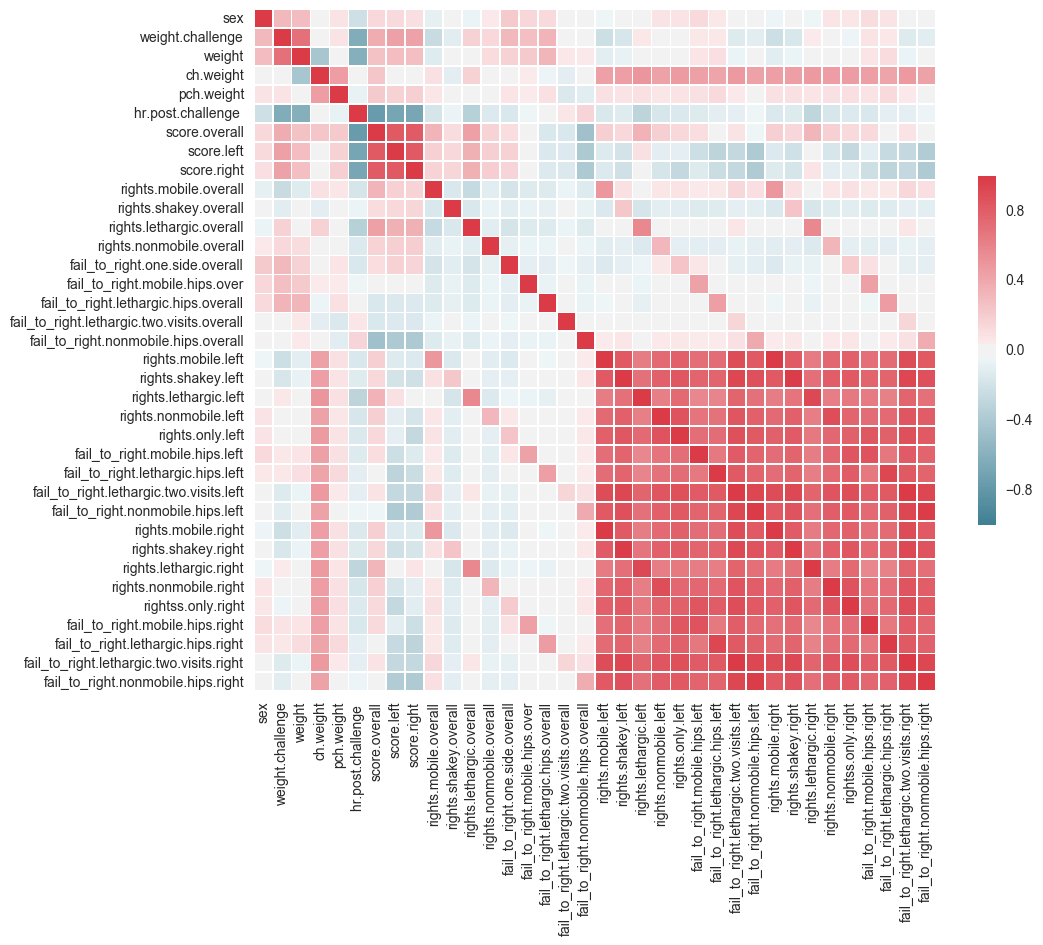

In [31]:
correlations = df_scaled_df.corr(method='pearson')
correlations

# Plot Correlations
corr = df_scaled_df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

**What we see here is the impact of data normalization on the extraction of meaningful information, here correlation, between different features**, after normalizing the data we can clearly see a block on the right corner of the correlation matrix, showing that the observation made by the scientists in the lab related to left and right behaviour are highly correlated.

What we need to do now is proceed for feature selection applying different methods and test this process with different classifiers in order to study the best combination of feature selection and model accuracy (algorithm)

# Feature Selection

There are different approaches to select a combination of the most important features in a given dataset. The attributes that we use to train the model have a huge influence on the performance we can achieve. Irrelevant features can negatively impact model performance. We need to automatically select the best features in our dataset.

Three benefits of performing feature selection before modeling are :  
- Reducing overfitting : less redundant data means less opportunity to make decisions based on noise
- Improving Accuracy : Less misleading data means modeling accuracy is better  
- Reducint Training time : even not relevant here as our dataset is not big, but less data means that algorithms train faster.

## Mean Decrease Impurity

In [32]:

X = df_scaled_df
Y = df_clean_2["outcome"]
names = df_scaled_df.columns
rf = RandomForestRegressor()
rf.fit(X, Y)
print "Features sorted by their score:"
pprint.pprint(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), names), reverse=True))

Features sorted by their score:
[(0.2093, 'weight.challenge'),
 (0.1402, 'score.overall'),
 (0.1115, 'rights.mobile.overall'),
 (0.0733, 'pch.weight'),
 (0.0664, 'hr.post.challenge '),
 (0.0614, 'score.right'),
 (0.053, 'score.left'),
 (0.0457, 'ch.weight'),
 (0.0343, 'weight'),
 (0.0252, 'rights.lethargic.overall'),
 (0.0248, 'sex'),
 (0.0199, 'rights.nonmobile.left'),
 (0.0199, 'fail_to_right.one.side.overall'),
 (0.0157, 'fail_to_right.mobile.hips.over'),
 (0.0146, 'rights.lethargic.left'),
 (0.0133, 'rights.shakey.overall'),
 (0.0077, 'fail_to_right.lethargic.hips.overall'),
 (0.0075, 'rights.shakey.left'),
 (0.0073, 'rights.lethargic.right'),
 (0.0066, 'fail_to_right.mobile.hips.right'),
 (0.006, 'rights.shakey.right'),
 (0.0054, 'rights.only.left'),
 (0.0044, 'rightss.only.right'),
 (0.0039, 'rights.nonmobile.right'),
 (0.0032, 'fail_to_right.lethargic.hips.left'),
 (0.0031, 'rights.mobile.right'),
 (0.003, 'rights.nonmobile.overall'),
 (0.0029, 'rights.mobile.left'),
 (0.0027, '

## Mean Decrease Accuracy

In [33]:
len(X.values)

585

In [34]:
rf = RandomForestRegressor()
scores = defaultdict(list)
 
#crossvalidate the scores on a number of different random splits of the data
for train_idx, test_idx in ShuffleSplit(len(X), 100, .3):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    Y_train, Y_test = Y.values[train_idx], Y.values[test_idx]
    r = rf.fit(X_train, Y_train)
    acc = r2_score(Y_test, rf.predict(X_test))
    for i in range(X.shape[1]):
        X_t = X_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = r2_score(Y_test, rf.predict(X_t))
        scores[names[i]].append((acc-shuff_acc)/acc)
print "Features sorted by their score:"
pprint.pprint(sorted([(round(np.mean(score), 4), feat) for feat, score in scores.items()], reverse=True))

Features sorted by their score:
[(0.6537, 'weight.challenge'),
 (0.3493, 'rights.mobile.overall'),
 (0.1559, 'score.overall'),
 (0.1462, 'pch.weight'),
 (0.0636, 'score.left'),
 (0.0462, 'rights.lethargic.overall'),
 (0.0276, 'ch.weight'),
 (0.0257, 'score.right'),
 (0.0242, 'fail_to_right.mobile.hips.over'),
 (0.0235, 'hr.post.challenge '),
 (0.0228, 'fail_to_right.one.side.overall'),
 (0.0202, 'rights.shakey.overall'),
 (0.0084, 'fail_to_right.lethargic.hips.overall'),
 (0.0018, 'rights.nonmobile.left'),
 (0.0011, 'weight'),
 (0.0011, 'fail_to_right.mobile.hips.left'),
 (0.001, 'fail_to_right.lethargic.two.visits.left'),
 (0.0003, 'rights.only.left'),
 (0.0003, 'fail_to_right.nonmobile.hips.overall'),
 (0.0002, 'rightss.only.right'),
 (0.0, 'fail_to_right.lethargic.two.visits.overall'),
 (-0.0001, 'fail_to_right.lethargic.two.visits.right'),
 (-0.0002, 'fail_to_right.nonmobile.hips.left'),
 (-0.0002, 'fail_to_right.lethargic.hips.left'),
 (-0.0004, 'rights.mobile.right'),
 (-0.0006, 

## Stability selection

In [35]:
from sklearn.linear_model import RandomizedLasso

rlasso = RandomizedLasso(alpha=0.025)
rlasso.fit(X, Y)
 
print "Features sorted by their score:"
pprint.pprint(sorted(zip(map(lambda x: x, rlasso.scores_), names), reverse=True))

Features sorted by their score:
[(0.0, 'weight.challenge'),
 (0.0, 'weight'),
 (0.0, 'sex'),
 (0.0, 'score.right'),
 (0.0, 'score.overall'),
 (0.0, 'score.left'),
 (0.0, 'rightss.only.right'),
 (0.0, 'rights.shakey.right'),
 (0.0, 'rights.shakey.overall'),
 (0.0, 'rights.shakey.left'),
 (0.0, 'rights.only.left'),
 (0.0, 'rights.nonmobile.right'),
 (0.0, 'rights.nonmobile.overall'),
 (0.0, 'rights.nonmobile.left'),
 (0.0, 'rights.mobile.right'),
 (0.0, 'rights.mobile.overall'),
 (0.0, 'rights.mobile.left'),
 (0.0, 'rights.lethargic.right'),
 (0.0, 'rights.lethargic.overall'),
 (0.0, 'rights.lethargic.left'),
 (0.0, 'pch.weight'),
 (0.0, 'hr.post.challenge '),
 (0.0, 'fail_to_right.one.side.overall'),
 (0.0, 'fail_to_right.nonmobile.hips.right'),
 (0.0, 'fail_to_right.nonmobile.hips.overall'),
 (0.0, 'fail_to_right.nonmobile.hips.left'),
 (0.0, 'fail_to_right.mobile.hips.right'),
 (0.0, 'fail_to_right.mobile.hips.over'),
 (0.0, 'fail_to_right.mobile.hips.left'),
 (0.0, 'fail_to_right.let

## RFE : Random Feature Elemination

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
 
#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print "Features sorted by their rank:"
pprint.pprint(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their rank:
[(1.0, 'fail_to_right.lethargic.two.visits.overall'),
 (2.0, 'fail_to_right.nonmobile.hips.overall'),
 (3.0, 'fail_to_right.lethargic.hips.overall'),
 (4.0, 'rights.mobile.left'),
 (5.0, 'rightss.only.right'),
 (6.0, 'rights.nonmobile.left'),
 (7.0, 'fail_to_right.mobile.hips.over'),
 (8.0, 'fail_to_right.mobile.hips.left'),
 (9.0, 'fail_to_right.one.side.overall'),
 (10.0, 'rights.lethargic.overall'),
 (11.0, 'rights.lethargic.right'),
 (12.0, 'fail_to_right.lethargic.two.visits.right'),
 (13.0, 'rights.only.left'),
 (14.0, 'rights.nonmobile.right'),
 (15.0, 'rights.lethargic.left'),
 (16.0, 'fail_to_right.lethargic.two.visits.left'),
 (17.0, 'rights.shakey.left'),
 (18.0, 'fail_to_right.lethargic.hips.left'),
 (19.0, 'fail_to_right.lethargic.hips.right'),
 (20.0, 'fail_to_right.nonmobile.hips.left'),
 (21.0, 'fail_to_right.mobile.hips.right'),
 (22.0, 'score.right'),
 (23.0, 'fail_to_right.nonmobile.hips.right'),
 (24.0, 'hr.post.challenge '),
 (25.0, '

In [37]:
from sklearn.linear_model import (LinearRegression, Ridge, 
                                  Lasso, RandomizedLasso)
from sklearn.feature_selection import RFE, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from minepy import MINE

In [38]:
X = X.values
Y = Y.values

ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
#lasso = Lasso(alpha=.05)
#lasso.fit(X, Y)
#ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
#rlasso = RandomizedLasso(alpha=0.04)
#rlasso.fit(X, Y)
#ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
r = {}
for name in names:
    r[name] = round(np.median([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))




	Corr.	Linear reg	MIC	RF	RFE	Ridge	Mean
sex	0.06	0.02	0.62	0.15	0.32	0.06	0.1
weight.challenge	1.0	0.01	0.73	1.0	0.03	1.0	0.86
weight	0.4	0.0	0.72	0.22	0.0	0.48	0.31
ch.weight	0.0	0.12	0.72	0.36	0.35	0.12	0.23
pch.weight	0.31	0.0	0.55	0.55	0.1	0.5	0.41
hr.post.challenge 	0.07	0.12	0.59	0.38	0.39	0.37	0.38
score.overall	0.27	0.01	0.92	0.98	0.13	0.44	0.35
score.left	0.29	0.03	1.0	0.61	0.19	0.45	0.37
score.right	0.26	0.22	0.99	0.23	0.45	0.4	0.33
rights.mobile.overall	0.92	0.33	0.73	0.97	0.26	0.15	0.53
rights.shakey.overall	0.12	0.35	0.23	0.06	0.29	0.03	0.17
rights.lethargic.overall	0.0	0.05	0.39	0.18	0.84	0.01	0.11
rights.nonmobile.overall	0.01	0.18	0.11	0.03	0.16	0.02	0.07
fail_to_right.one.side.overall	0.24	0.39	0.32	0.08	0.87	0.13	0.28
fail_to_right.mobile.hips.over	0.02	0.35	0.16	0.05	0.94	0.01	0.11
fail_to_right.lethargic.hips.overall	0.47	0.47	0.2	0.03	1.0	0.12	0.33
fail_to_right.lethargic.two.visits.overall	0.11	0.96	0.0	0.0	1.0	0.01	0.06
fail_to_right.nonmobile.hips.overall	0.67	0

In [39]:
methods

['Corr.', 'Linear reg', 'MIC', 'RF', 'RFE', 'Ridge', 'Mean']

In [40]:
map(str, [ranks[method]['sex'] for method in methods])

['0.06', '0.02', '0.62', '0.15', '0.32', '0.06', '0.1']

In [41]:
results_FS = pd.DataFrame(columns=methods)
for name in names:
    results_FS.loc[name] = map(float, [ranks[method][name] for method in methods])

In [42]:
results_FS.head()

,Corr.,Linear reg,MIC,RF,RFE,Ridge,Mean
sex,0.06,0.02,0.62,0.15,0.32,0.06,0.10
weight.challenge,1.00,0.01,0.73,1.00,0.03,1.00,0.86
weight,0.40,0.00,0.72,0.22,0.00,0.48,0.31
ch.weight,0.00,0.12,0.72,0.36,0.35,0.12,0.23
pch.weight,0.31,0.00,0.55,0.55,0.10,0.50,0.41


In [43]:
results_FS.sort(['Mean'], ascending=False)

/Users/Rad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Corr.,Linear reg,MIC,RF,RFE,Ridge,Mean
weight.challenge,1.00,0.01,0.73,1.00,0.03,1.00,0.86
rights.mobile.overall,0.92,0.33,0.73,0.97,0.26,0.15,0.53
fail_to_right.nonmobile.hips.overall,0.67,0.87,0.22,0.00,1.00,0.10,0.45
pch.weight,0.31,0.00,0.55,0.55,0.10,0.50,0.41
hr.post.challenge,0.07,0.12,0.59,0.38,0.39,0.37,0.38
score.left,0.29,0.03,1.00,0.61,0.19,0.45,0.37
score.overall,0.27,0.01,0.92,0.98,0.13,0.44,0.35
fail_to_right.lethargic.hips.overall,0.47,0.47,0.20,0.03,1.00,0.12,0.33
score.right,0.26,0.22,0.99,0.23,0.45,0.40,0.33
fail_to_right.lethargic.hips.right,0.23,0.52,0.43,0.03,0.55,0.16,0.33


In [44]:
results_FS['Features'] = results_FS.index
results_FS.reset_index(level=0, inplace=True)
results_FS.head()

,index,Corr.,Linear reg,MIC,RF,RFE,Ridge,Mean,Features
0,sex,0.06,0.02,0.62,0.15,0.32,0.06,0.10,sex
1,weight.challenge,1.00,0.01,0.73,1.00,0.03,1.00,0.86,weight.challenge
2,weight,0.40,0.00,0.72,0.22,0.00,0.48,0.31,weight
3,ch.weight,0.00,0.12,0.72,0.36,0.35,0.12,0.23,ch.weight
4,pch.weight,0.31,0.00,0.55,0.55,0.10,0.50,0.41,pch.weight


In [45]:
results_FS = results_FS.drop(['index'], axis=1)

In [46]:
results_FS.to_csv("results_Feature_Selection.csv", index=False, header=True, np="\t")

/Users/Rad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


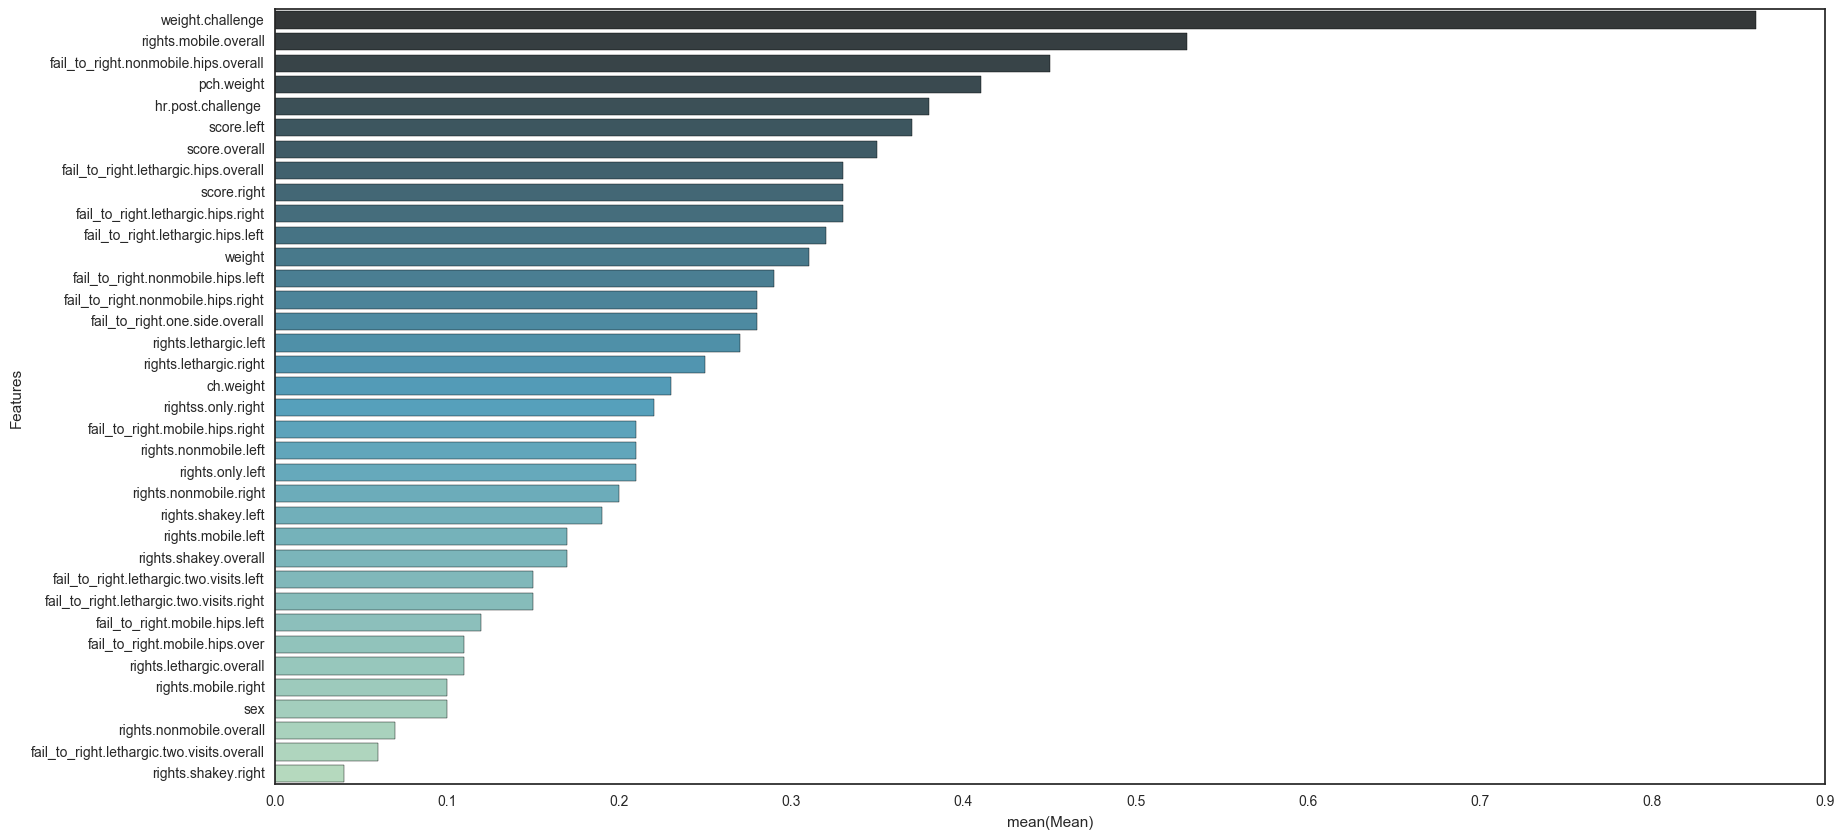

In [47]:
ax = sns.barplot(y="Features", x="Mean", data=results_FS.sort(['Mean'], ascending=False), orient='h', palette="GnBu_d")

In [48]:
X = df_scaled_df.drop(["score.left", "score.overall", "score.right"], axis = 1)
Y = df_clean_2["outcome"]

In [49]:
df_scaled_df.shape

(585, 36)

In [50]:
Y.shape

(585,)

	Corr.	Linear reg	MIC	RF	RFE	Ridge	Mean
sex	0.06	0.02	0.72	0.21	0.14	0.06	0.1
weight.challenge	1.0	0.0	0.85	0.63	0.18	1.0	0.74
weight	0.4	0.0	0.83	0.34	0.25	0.49	0.37
ch.weight	0.0	0.09	0.84	0.38	0.11	0.11	0.11
pch.weight	0.31	0.0	0.64	0.5	0.0	0.67	0.41
hr.post.challenge 	0.07	0.09	0.68	0.63	0.32	0.06	0.21
rights.mobile.overall	0.92	0.6	0.85	1.0	0.71	0.21	0.78
rights.shakey.overall	0.12	0.69	0.27	0.23	0.43	0.05	0.25
rights.lethargic.overall	0.0	0.19	0.45	0.43	0.39	0.04	0.29
rights.nonmobile.overall	0.01	0.49	0.13	0.06	0.36	0.01	0.1
fail_to_right.one.side.overall	0.24	0.07	0.38	0.1	0.21	0.14	0.17
fail_to_right.mobile.hips.over	0.02	0.01	0.19	0.11	0.04	0.01	0.03
fail_to_right.lethargic.hips.overall	0.47	0.08	0.23	0.04	0.29	0.17	0.2
fail_to_right.lethargic.two.visits.overall	0.11	0.04	0.0	0.0	0.07	0.02	0.03
fail_to_right.nonmobile.hips.overall	0.67	0.26	0.25	0.15	1.0	0.15	0.26
rights.mobile.left	0.08	0.48	0.99	0.01	0.64	0.14	0.31
rights.shakey.left	0.0	0.73	0.41	0.07	0.68	0.01	0.24
rights

/Users/Rad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:73: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


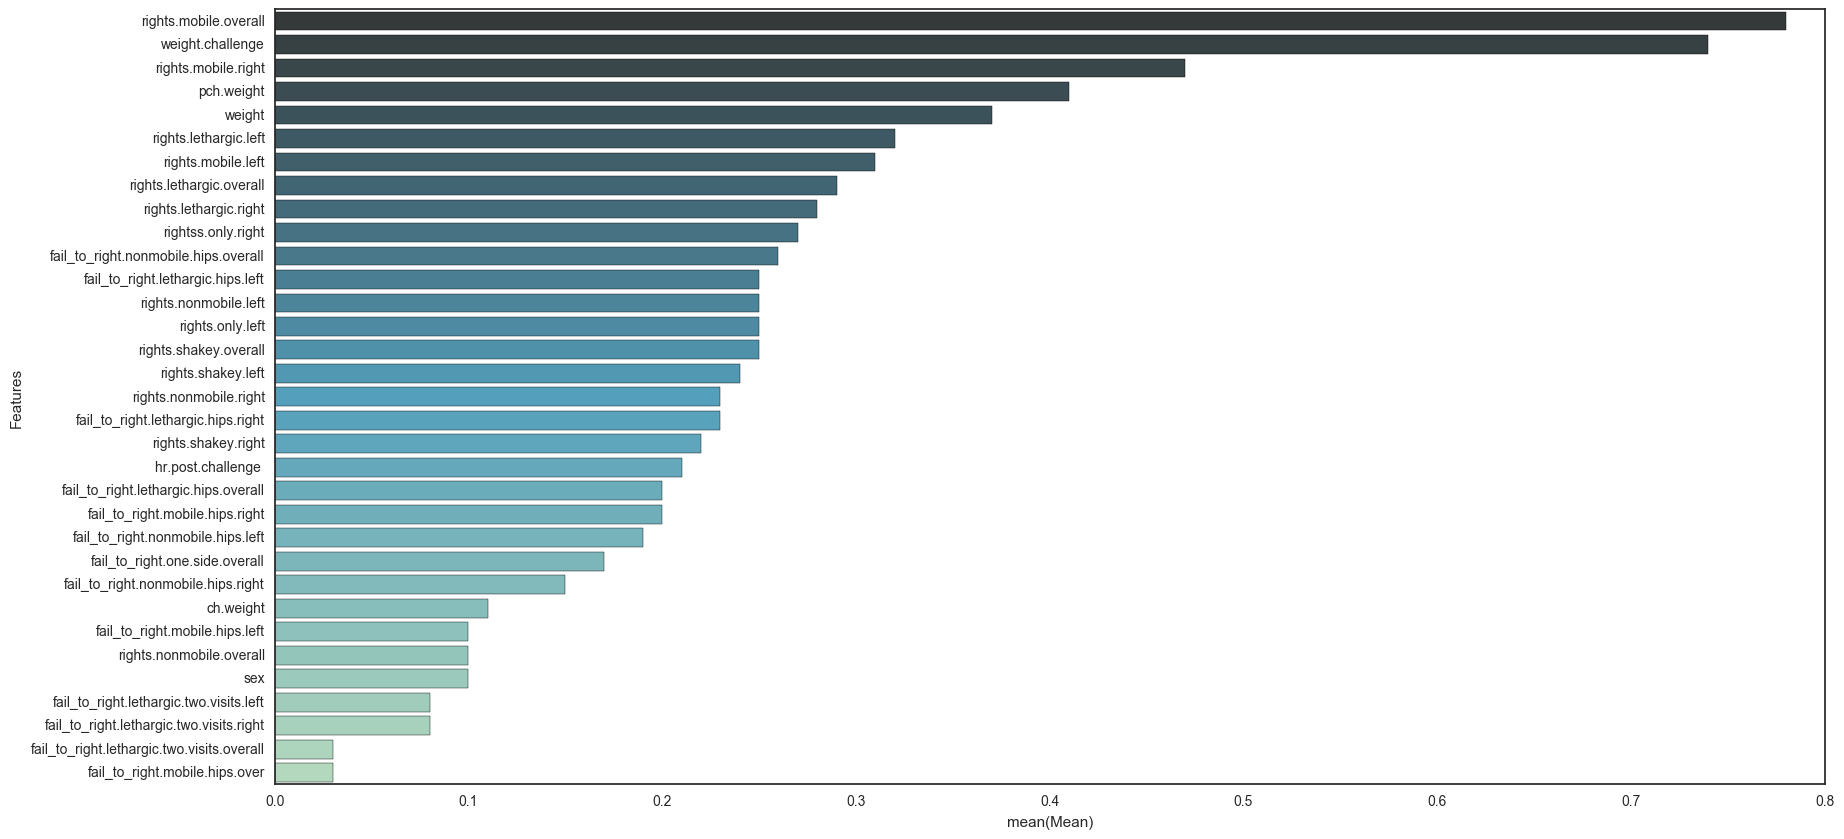

In [51]:
names = X.columns
X = X.values
Y = Y.values

ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
#lasso = Lasso(alpha=.05)
#lasso.fit(X, Y)
#ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
#rlasso = RandomizedLasso(alpha=0.04)
#rlasso.fit(X, Y)
#ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
r = {}
for name in names:
    r[name] = round(np.median([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))


results_FS = pd.DataFrame(columns=methods)
for name in names:
    results_FS.loc[name] = map(float, [ranks[method][name] for method in methods])

results_FS['Features'] = results_FS.index
results_FS.reset_index(level=0, inplace=True)
results_FS.head()
results_FS = results_FS.drop(['index'], axis=1)
ax = sns.barplot(y="Features", x="Mean", data=results_FS.sort(['Mean'], ascending=False), orient='h', palette="GnBu_d")

In [52]:
results_FS.sort(['RFE'], ascending=False)

/Users/Rad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Corr.,Linear reg,MIC,RF,RFE,Ridge,Mean,Features
24,0.08,0.79,1.00,0.02,1.00,0.14,0.47,rights.mobile.right
31,0.03,0.11,0.32,0.00,1.00,0.06,0.08,fail_to_right.lethargic.two.visits.right
14,0.67,0.26,0.25,0.15,1.00,0.15,0.26,fail_to_right.nonmobile.hips.overall
21,0.24,0.25,0.52,0.05,1.00,0.25,0.25,fail_to_right.lethargic.hips.left
22,0.03,0.11,0.32,0.00,1.00,0.06,0.08,fail_to_right.lethargic.two.visits.left
25,0.00,0.67,0.42,0.03,0.96,0.01,0.22,rights.shakey.right
18,0.07,1.00,0.38,0.05,0.93,0.12,0.25,rights.nonmobile.left
28,0.07,0.66,0.40,0.02,0.89,0.13,0.27,rightss.only.right
27,0.06,0.77,0.36,0.04,0.86,0.11,0.23,rights.nonmobile.right
26,0.00,0.99,0.51,0.05,0.82,0.00,0.28,rights.lethargic.right


# Classification Algorithms Evaluation

## Without feature cleaning

In [53]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

/Users/Rad/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [54]:
#X = df_scaled_df.drop(["score.left", "score.overall", "score.right"], axis = 1)
X = df_scaled_df
Y = df_clean_2["outcome"]

It is a good idea to use a validation hold-out set. This is a sample of the data that we hold back from our analysis and modeling. We use it right at the end of our project to confirm the accuracy of our final model. It is a smoke test that we can use to see if we messed up and to give us confidence on our estimates of accuracy on unseen data. We will use 80% of the dataset for modeling and hold back 20% for validation.

In [55]:
# Validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)

### Evaluate algorithms : Baseline

In [56]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LR: 0.719750 (0.074029)
LDA: 0.766883 (0.073763)
KNN: 0.794820 (0.055576)


/Users/Rad/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:389: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


CART: 0.765032 (0.088239)
NB: 0.670999 (0.032579)
SVM: 0.581082 (0.047989)


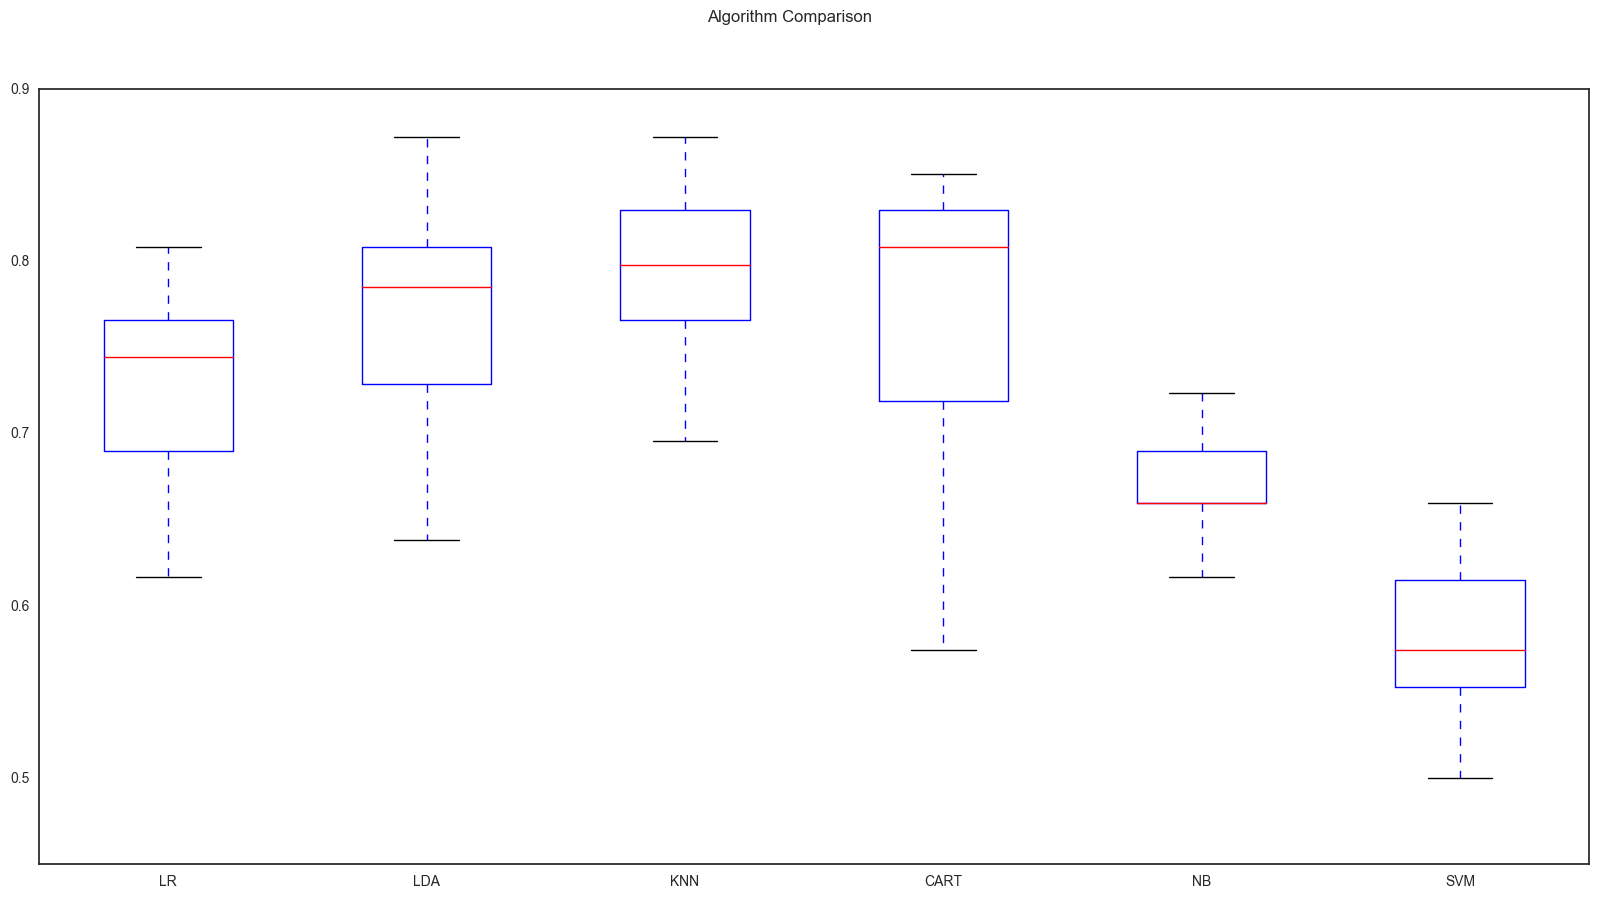

In [57]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Ensemble Methods

In [58]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.770953 (0.063911)
GBM: 0.786216 (0.053573)
RF: 0.779741 (0.068209)
ET: 0.747734 (0.060364)


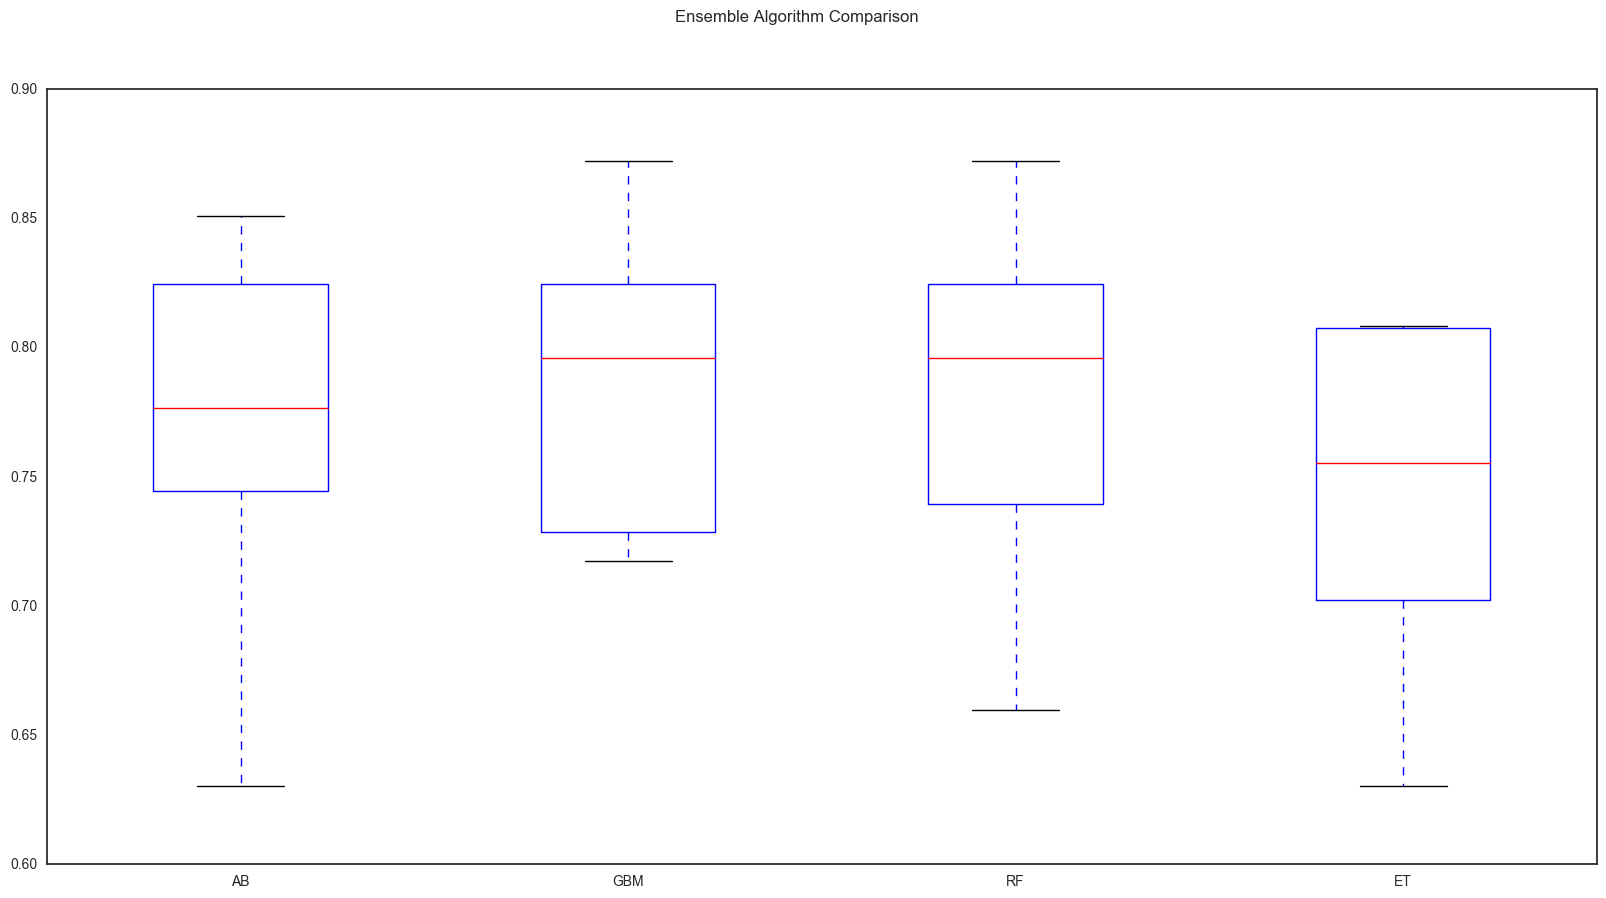

In [59]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## With feature cleaning : keeping only important features

### Including Scores

In [60]:
X = df_scaled_df
Y = df_clean_2["outcome"]

In [61]:
#X = X[["rights.mobile.overall", "weight.challenge", "fail_to_right.nonmobile.hips.overall", "score.right", "score.left" ]]

X = X[["weight.challenge", "fail_to_right.nonmobile.hips.overall", "score.right", "rights.mobile.overall", "pch.weight", "score.left"]]

LR: 0.711332 (0.081308)
LDA: 0.764709 (0.051799)
KNN: 0.799075 (0.063041)
CART: 0.775578 (0.067906)
NB: 0.638760 (0.050777)
SVM: 0.589639 (0.053862)


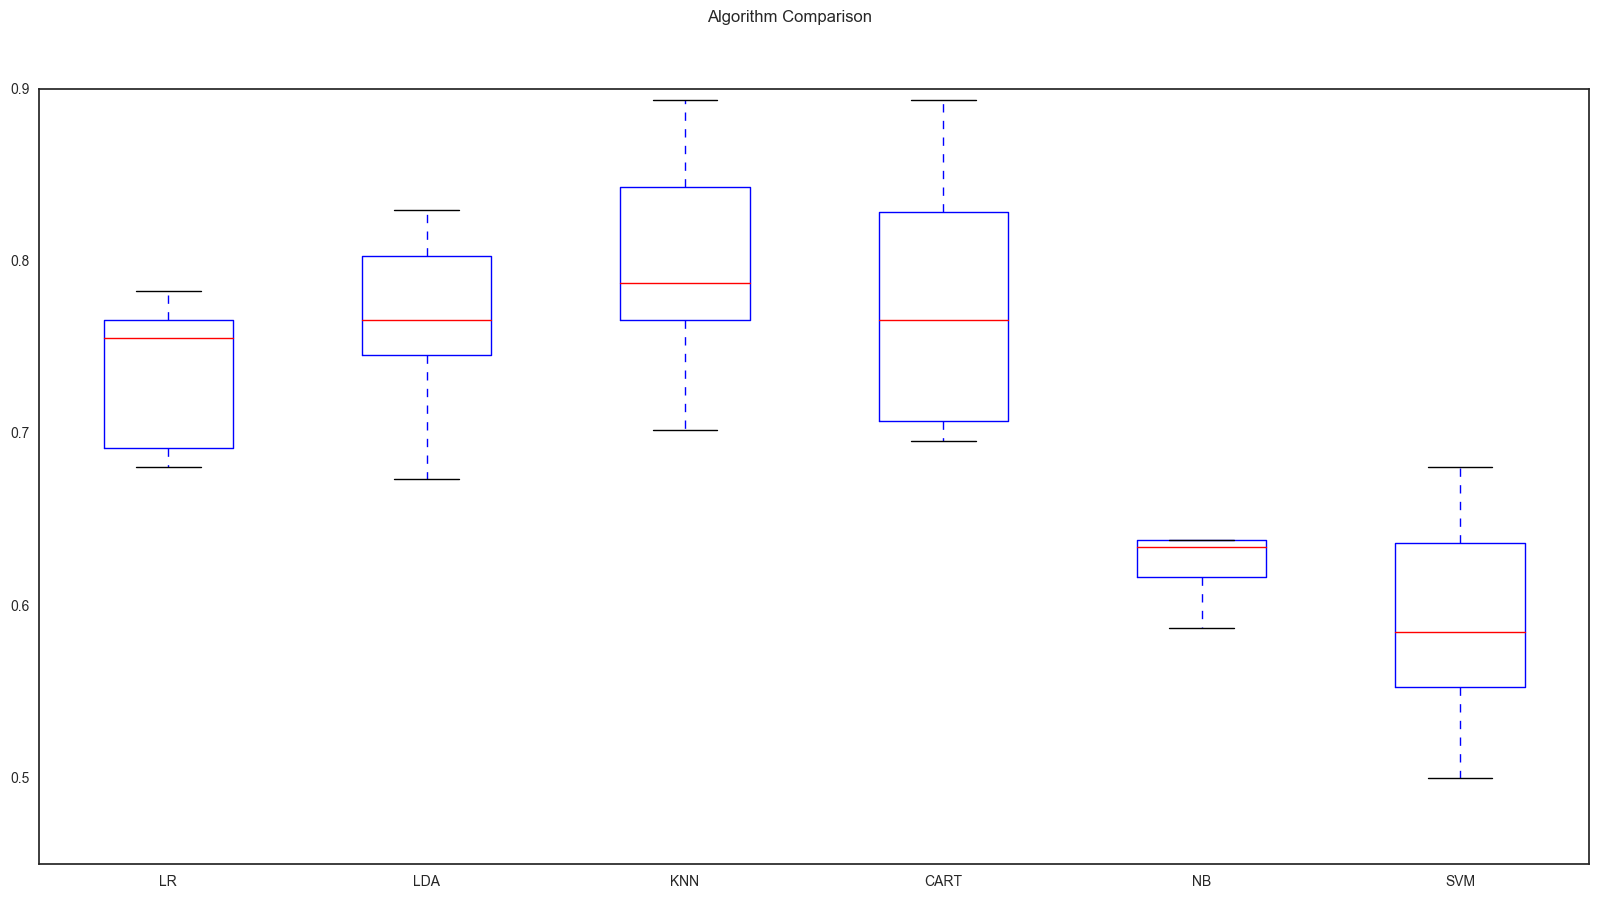

AB: 0.777475 (0.049614)
GBM: 0.783996 (0.048211)
RF: 0.775532 (0.044438)
ET: 0.777752 (0.050193)


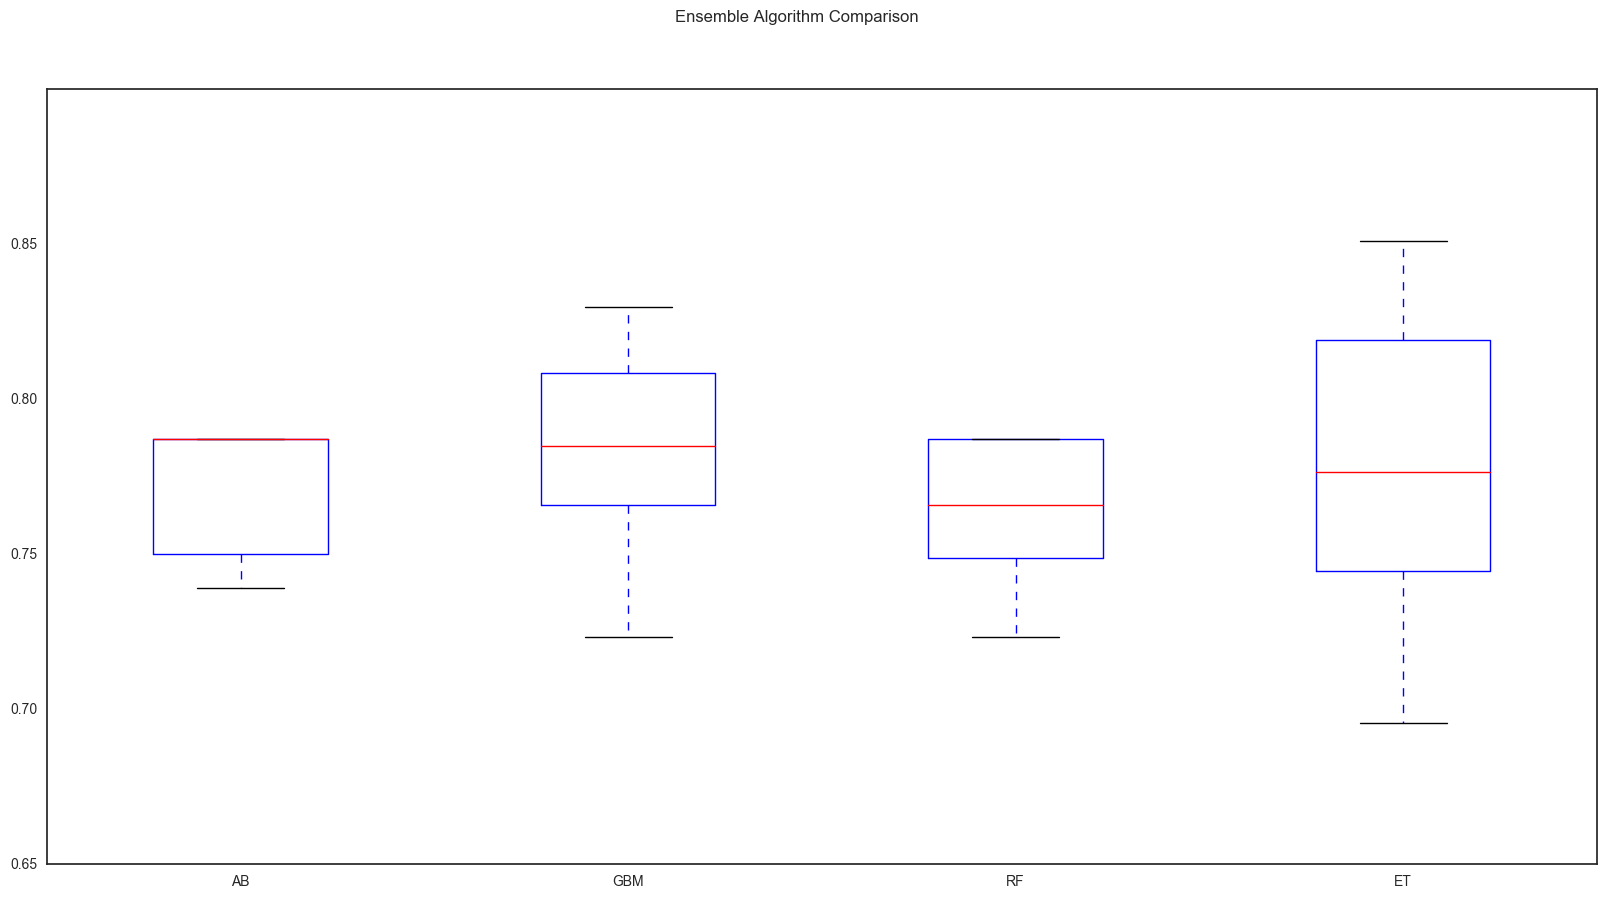

In [62]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)


# Baseline

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [63]:
# prepare the model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.846153846154
[[51  9]
 [ 9 48]]
             precision    recall  f1-score   support

        0.0       0.85      0.85      0.85        60
        1.0       0.84      0.84      0.84        57

avg / total       0.85      0.85      0.85       117



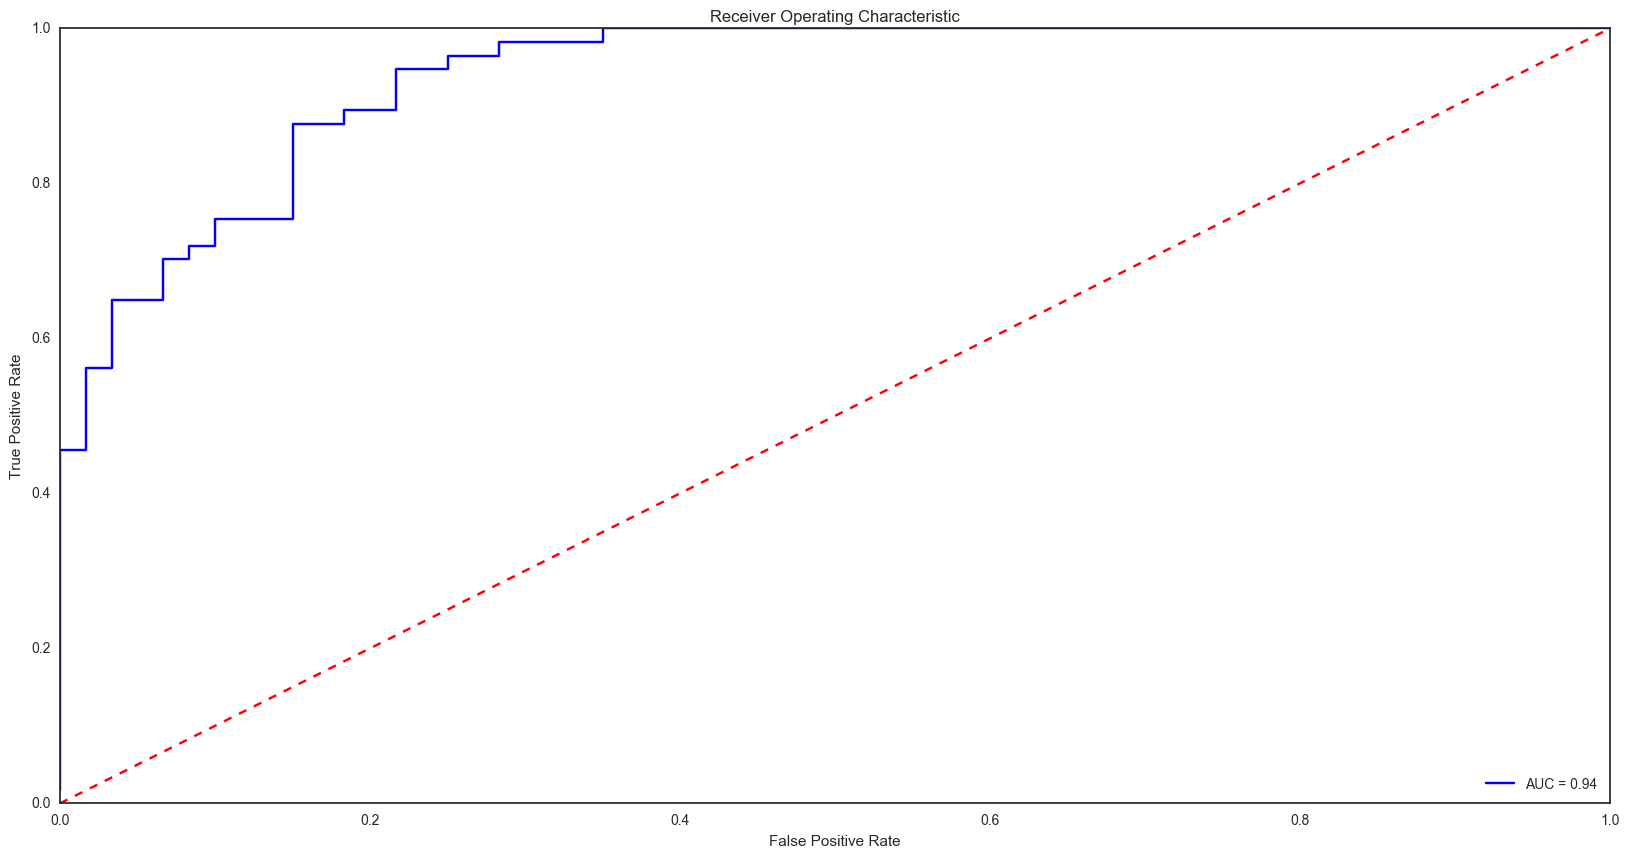

In [64]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Excluding scores

In [65]:
X = df_scaled_df
Y = df_clean_2["outcome"]

In [66]:
list(X)


['sex',
 'weight.challenge',
 'weight',
 'ch.weight',
 'pch.weight',
 'hr.post.challenge ',
 'score.overall',
 'score.left',
 'score.right',
 'rights.mobile.overall',
 'rights.shakey.overall',
 'rights.lethargic.overall',
 'rights.nonmobile.overall',
 'fail_to_right.one.side.overall',
 'fail_to_right.mobile.hips.over',
 'fail_to_right.lethargic.hips.overall',
 'fail_to_right.lethargic.two.visits.overall',
 'fail_to_right.nonmobile.hips.overall',
 'rights.mobile.left',
 'rights.shakey.left',
 'rights.lethargic.left',
 'rights.nonmobile.left',
 'rights.only.left',
 'fail_to_right.mobile.hips.left',
 'fail_to_right.lethargic.hips.left',
 'fail_to_right.lethargic.two.visits.left',
 'fail_to_right.nonmobile.hips.left',
 'rights.mobile.right',
 'rights.shakey.right',
 'rights.lethargic.right',
 'rights.nonmobile.right',
 'rightss.only.right',
 'fail_to_right.mobile.hips.right',
 'fail_to_right.lethargic.hips.right',
 'fail_to_right.lethargic.two.visits.right',
 'fail_to_right.nonmobile.hips.

In [67]:
X = X[["rights.mobile.overall", "weight.challenge", "rights.mobile.right", "pch.weight", "weight"]]


LR: 0.638668 (0.068855)
LDA: 0.709297 (0.053928)
KNN: 0.726364 (0.051046)
CART: 0.704857 (0.065190)
NB: 0.711378 (0.030557)
SVM: 0.583210 (0.057752)


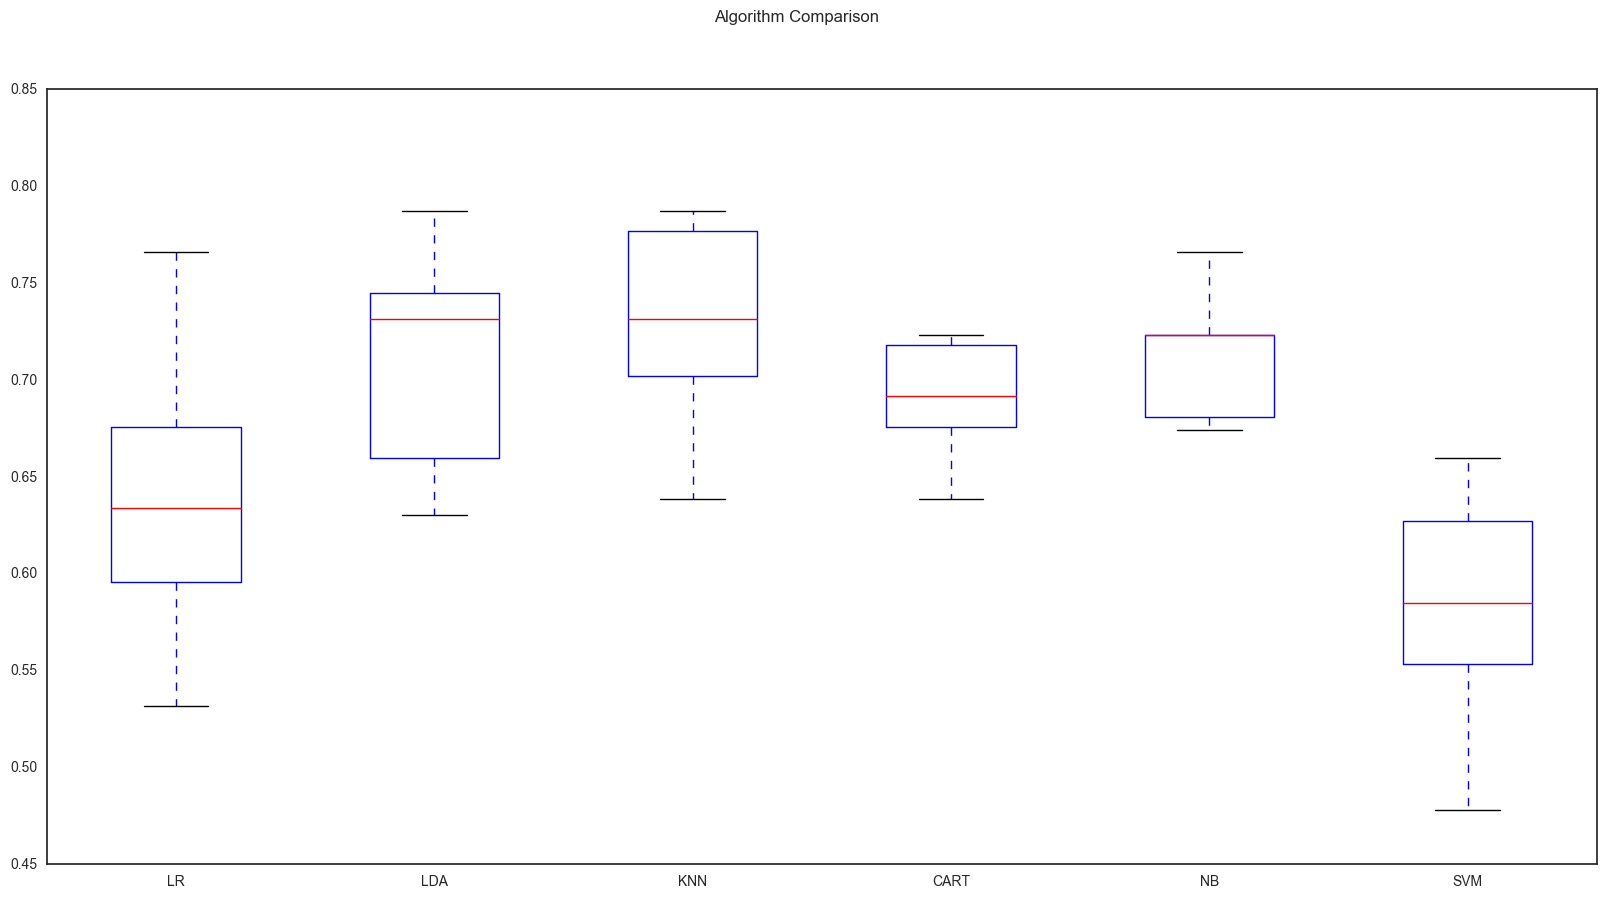

AB: 0.728307 (0.065812)
GBM: 0.724098 (0.054912)
RF: 0.713460 (0.041166)
ET: 0.696577 (0.060026)


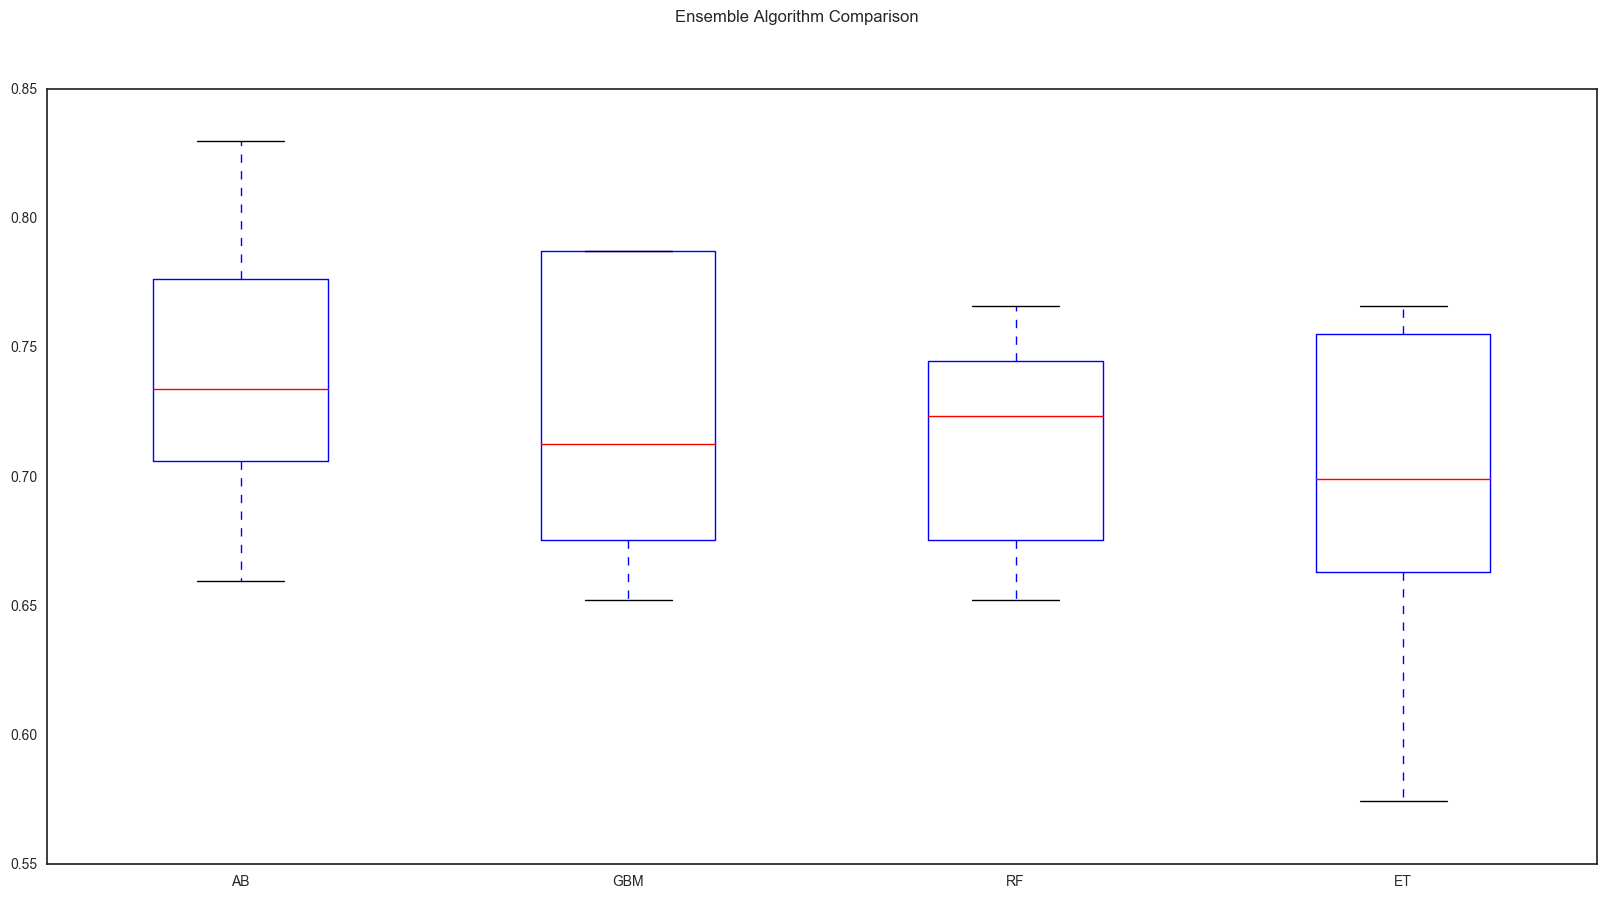

In [68]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)


# Baseline

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



In [69]:
# prepare the model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model = AdaBoostClassifier()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.74358974359
[[46 14]
 [16 41]]
             precision    recall  f1-score   support

        0.0       0.74      0.77      0.75        60
        1.0       0.75      0.72      0.73        57

avg / total       0.74      0.74      0.74       117



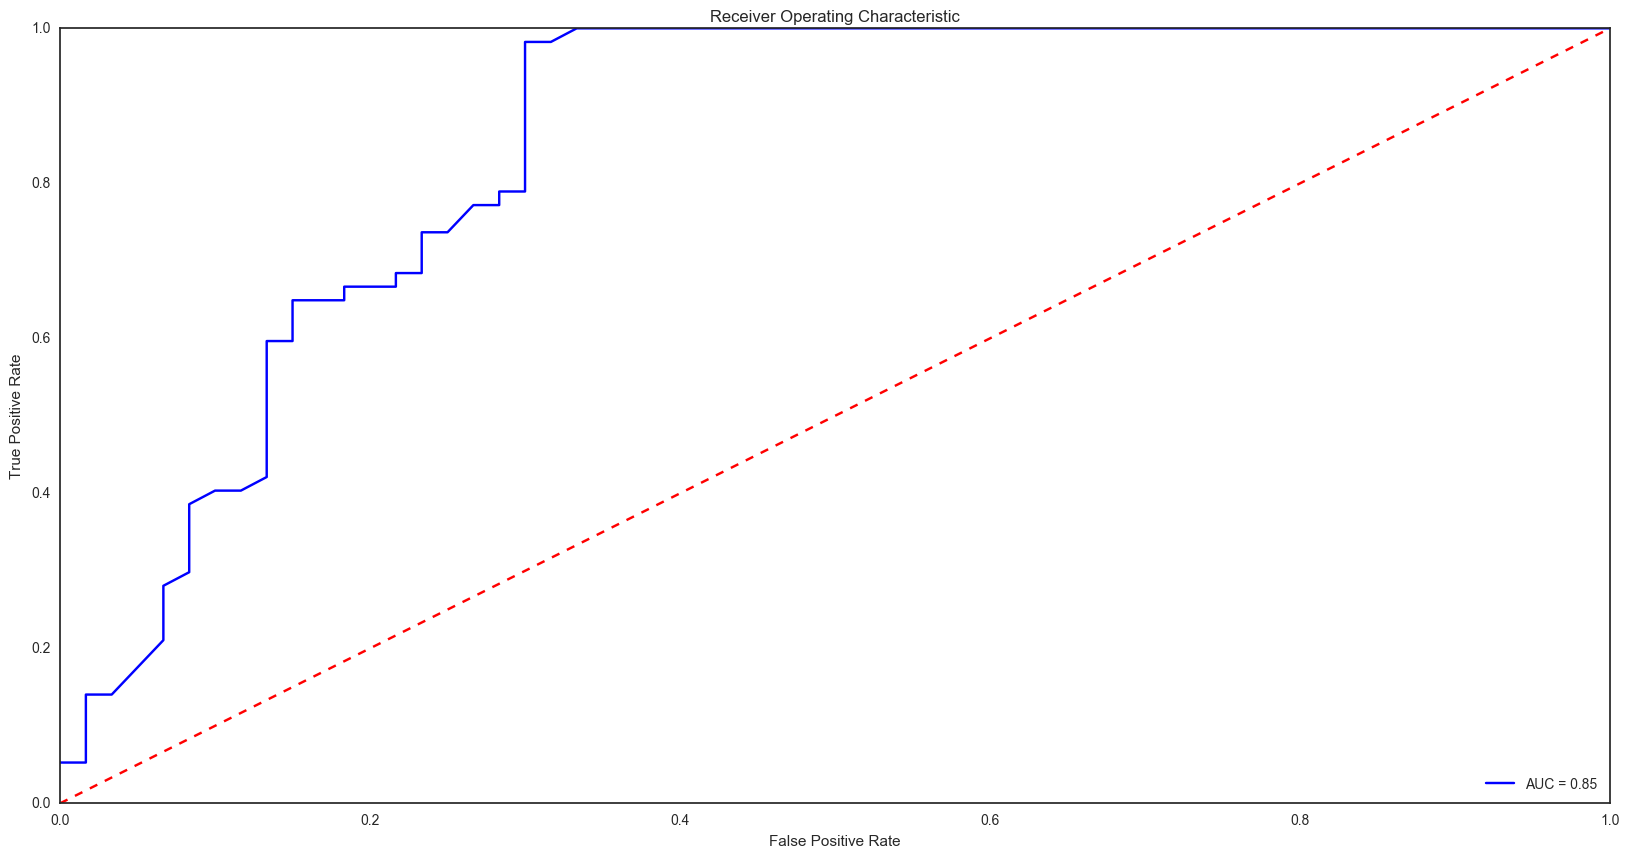

In [70]:
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [71]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
# load data
X = df_scaled_df
Y = df_clean_2["outcome"]

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 10)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_
pprint.pprint(zip(fit.support_, X.columns, fit.ranking_))

Num Features: 10
Selected Features: [False  True  True  True  True  True  True  True  True False False False
 False False False False False False False False False False False False
  True False False False False False False False False  True False False]
Feature Ranking: [14  1  1  1  1  1  1  1  1  2 17 24 19  3 27  5 25 11  7 23 15  4 13 18  1
 22 12  8 26 16  6  9 20  1 21 10]
[(False, 'sex', 14),
 (True, 'weight.challenge', 1),
 (True, 'weight', 1),
 (True, 'ch.weight', 1),
 (True, 'pch.weight', 1),
 (True, 'hr.post.challenge ', 1),
 (True, 'score.overall', 1),
 (True, 'score.left', 1),
 (True, 'score.right', 1),
 (False, 'rights.mobile.overall', 2),
 (False, 'rights.shakey.overall', 17),
 (False, 'rights.lethargic.overall', 24),
 (False, 'rights.nonmobile.overall', 19),
 (False, 'fail_to_right.one.side.overall', 3),
 (False, 'fail_to_right.mobile.hips.over', 27),
 (False, 'fail_to_right.lethargic.hips.overall', 5),
 (False, 'fail_to_right.lethargic.two.visits.overall', 25),
 (Fal

In [72]:
X = X[["weight.challenge", "weight", "ch.weight", "pch.weight", "hr.post.challenge ", "score.overall",  "score.left", "score.right", "fail_to_right.lethargic.hips.left", "fail_to_right.lethargic.hips.right" ]]


LR: 0.713321 (0.075927)
LDA: 0.741073 (0.085297)
KNN: 0.790518 (0.049840)
CART: 0.771462 (0.062296)
NB: 0.720259 (0.066260)
SVM: 0.583210 (0.051746)


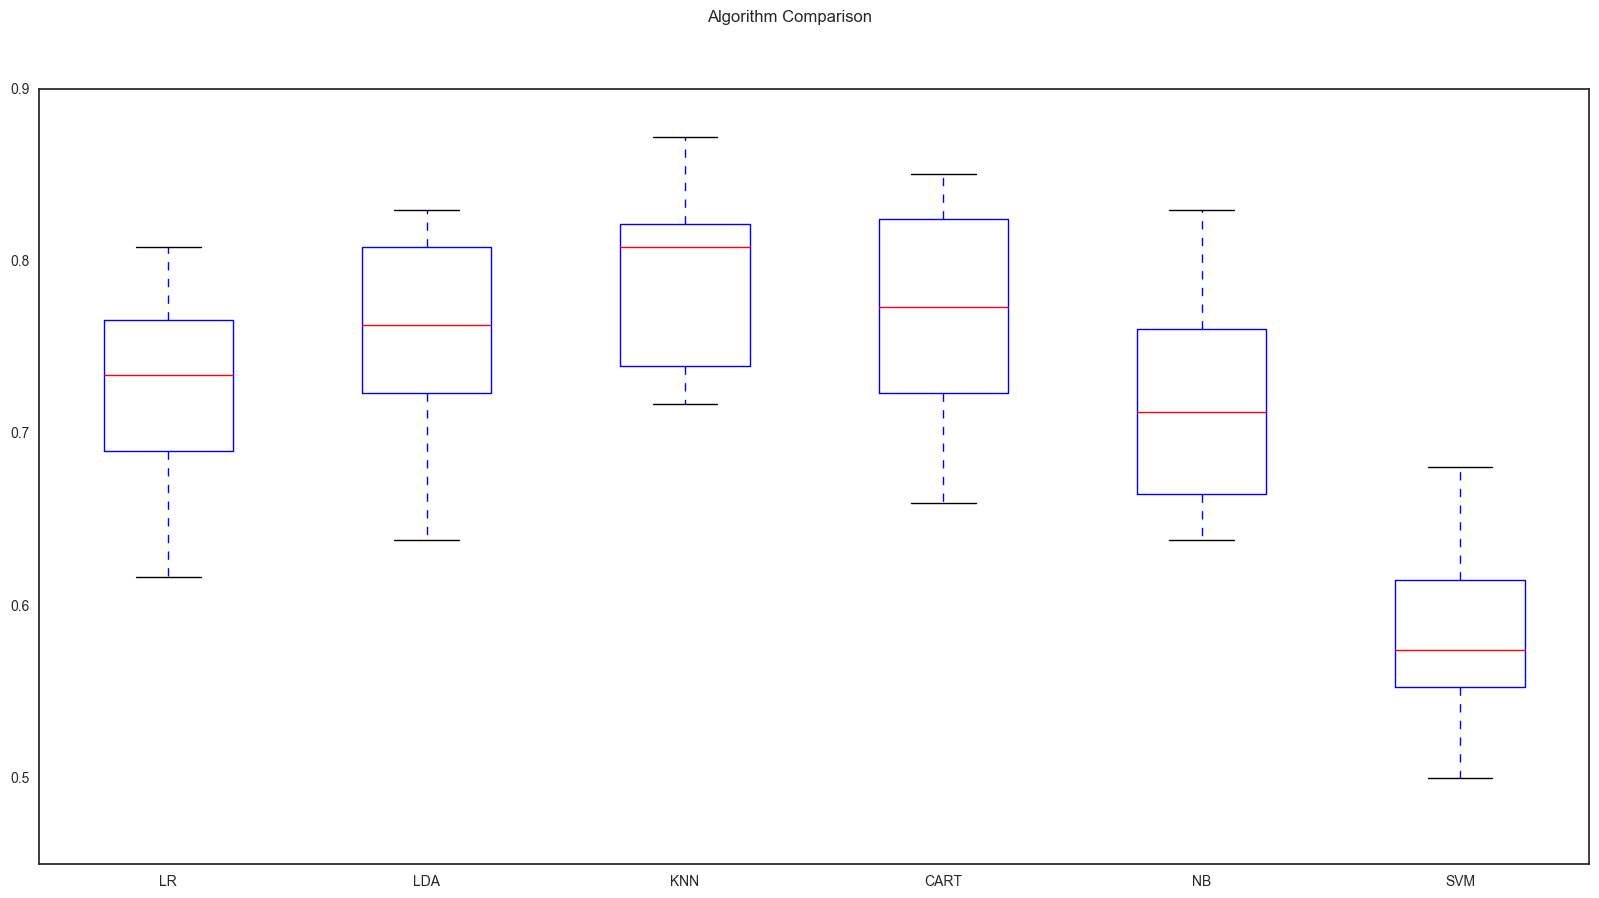

AB: 0.790287 (0.071248)
GBM: 0.796994 (0.065498)
RF: 0.801295 (0.050474)
ET: 0.775624 (0.063522)


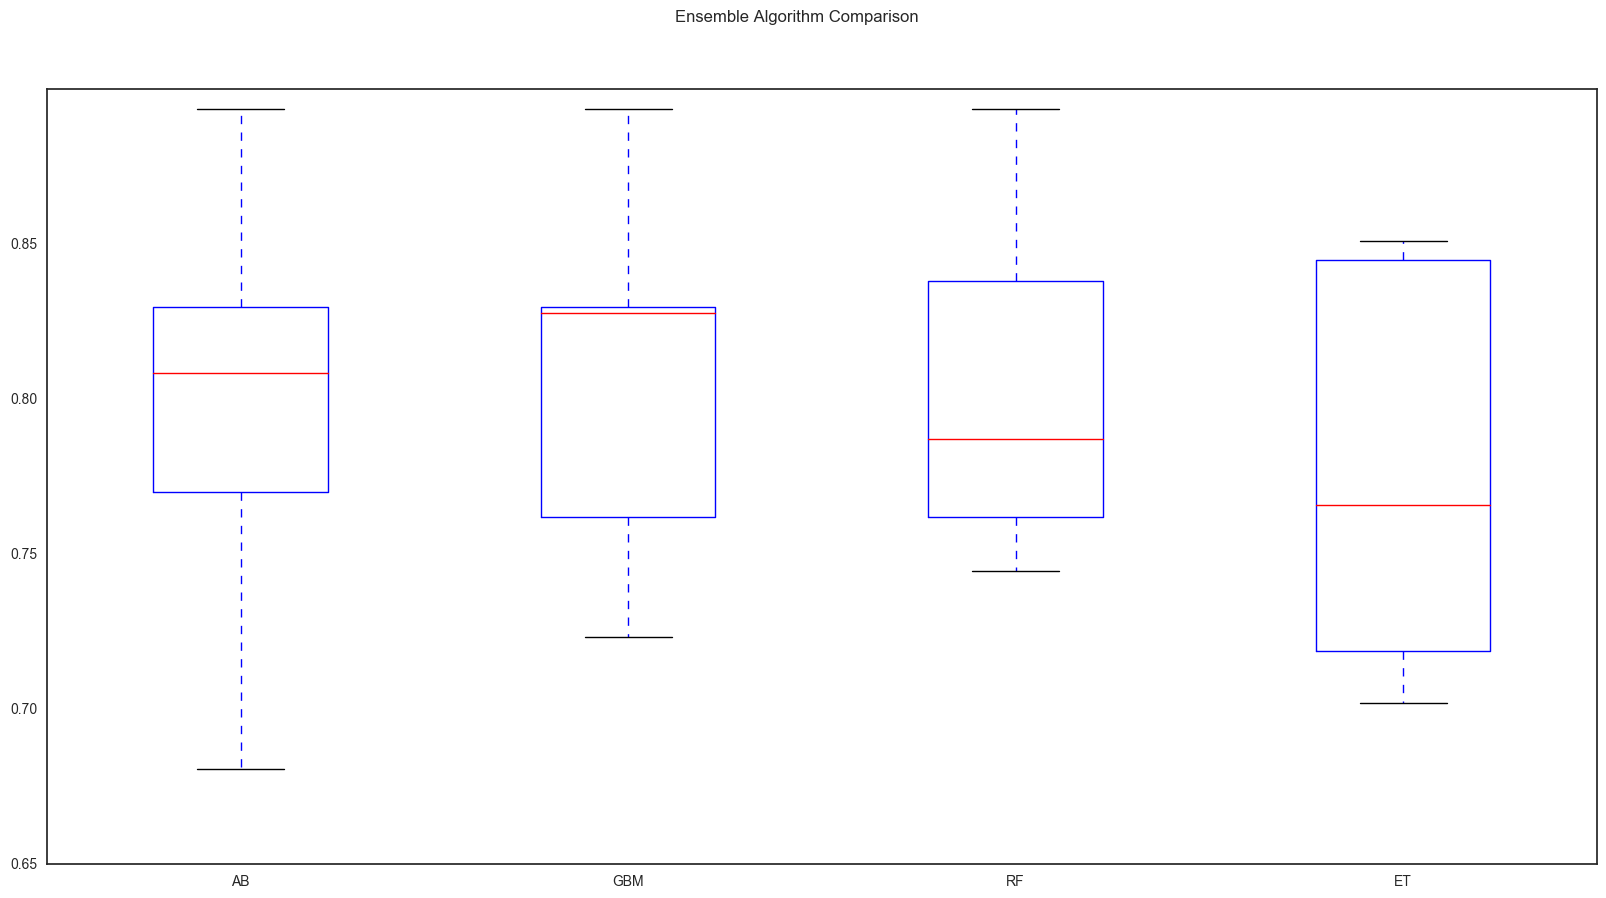

In [73]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)


# Baseline

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



0.863247863248
[[52  8]
 [ 8 49]]
             precision    recall  f1-score   support

        0.0       0.87      0.87      0.87        60
        1.0       0.86      0.86      0.86        57

avg / total       0.86      0.86      0.86       117



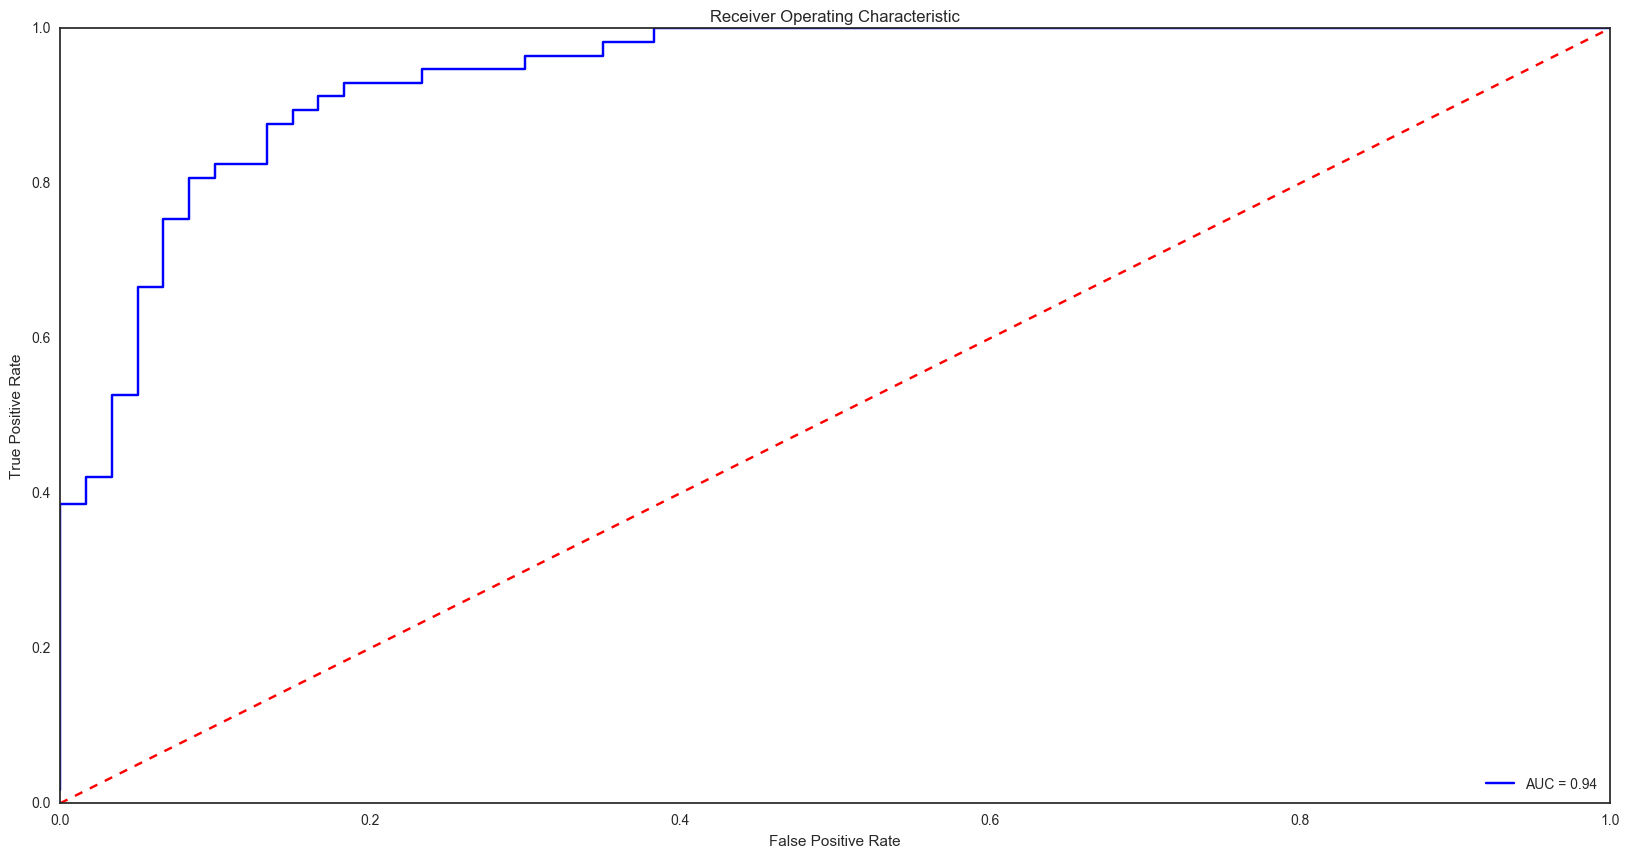

In [74]:
# prepare the model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model = GradientBoostingClassifier()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Reducing features using PCA


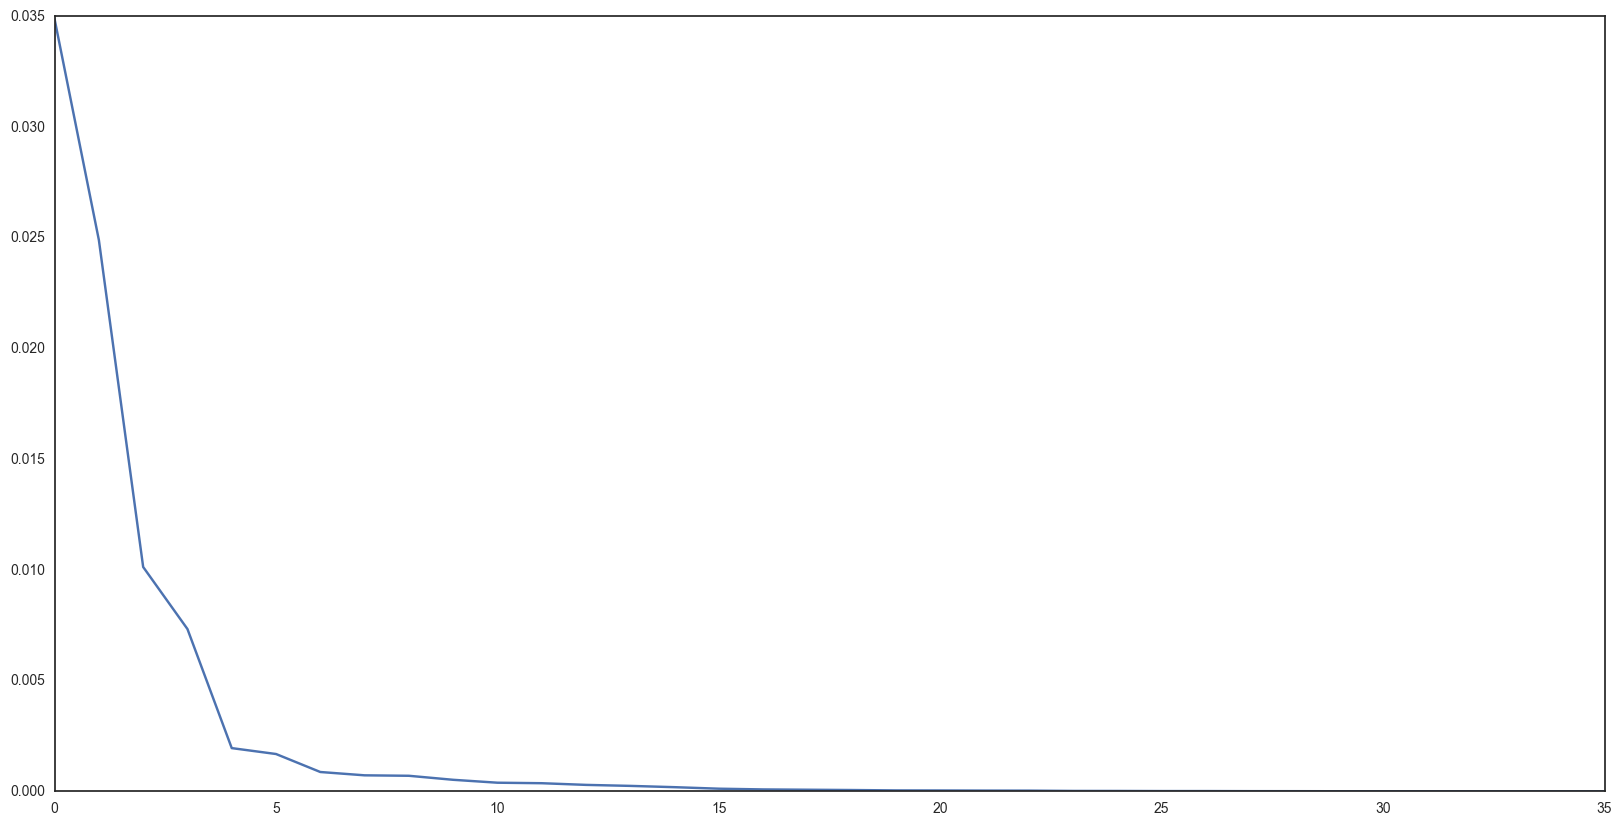

In [75]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# load data
X = df_scaled_df
Y = df_clean_2["outcome"]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)

pca = PCA(n_components=36)

pca.fit(X_train)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#plt.plot(var1)
plt.plot(pca.explained_variance_)



In [76]:
print pca.explained_variance_ratio_.cumsum()

[ 0.40708618  0.69770126  0.81595793  0.90149551  0.92425704  0.94390492
  0.95406805  0.96247975  0.97065113  0.9767027   0.98121873  0.98546914
  0.98884146  0.99168432  0.99384696  0.99520759  0.99618293  0.99700068
  0.99765986  0.99811834  0.99854363  0.99890761  0.99924945  0.99943572
  0.99960648  0.99972053  0.99983301  0.9999008   0.99995676  0.99997657
  0.9999903   0.99999783  1.          1.          1.          1.        ]


In [77]:
from sklearn.model_selection import cross_val_predict, GridSearchCV

In [78]:
# initiate PCA and classifier
pca = PCA(n_components=4)
classifier = RandomForestClassifier(n_estimators=500)

#regularization 

#param_grid = {
#                 'n_estimators': [5, 10, 15, 20, 100, 200, 300],
#                 'max_depth': [2, 5, 7, 9, 50]
#             }

#grid_clf = GridSearchCV(classifier, param_grid, cv=10)

# transform / fit
#pca.fit(X_train)
X_transformed = pca.fit_transform(X_train)

#scores = cross_val_score(classifier, X_transformed, Y_train, cv = 10, scoring='precision')
classifier.fit(X_transformed, Y_train)

# predict "new" data
# (I'm faking it here by using the original data)

newdata = X_validation

# transform new data using already fitted pca
# (don't re-fit the pca)
newdata_transformed = pca.transform(newdata)

# predict labels using the trained classifier

pred_labels = classifier.predict(newdata_transformed)


In [ ]:
print pca.components_.T

In [79]:
explained_var =  pd.DataFrame(pca.components_.T,index=X_train.columns,columns= ['PC-1','PC-2', 'PC-3', 'PC-4'])

explained_var.to_csv("explained_variance.csv", index=True, header=True, sep="\t")

In [80]:
explained_var.head()

,PC-1,PC-2,PC-3,PC-4
sex,-0.021,0.013,0.023,0.074
weight.challenge,-0.161,0.213,0.093,0.541
weight,-0.114,0.187,0.143,0.649
ch.weight,-0.058,-0.060,0.108,-0.131
pch.weight,-0.775,-0.618,-0.074,0.063


0.820512820513
[[49 11]
 [10 47]]
             precision    recall  f1-score   support

        0.0       0.83      0.82      0.82        60
        1.0       0.81      0.82      0.82        57

avg / total       0.82      0.82      0.82       117



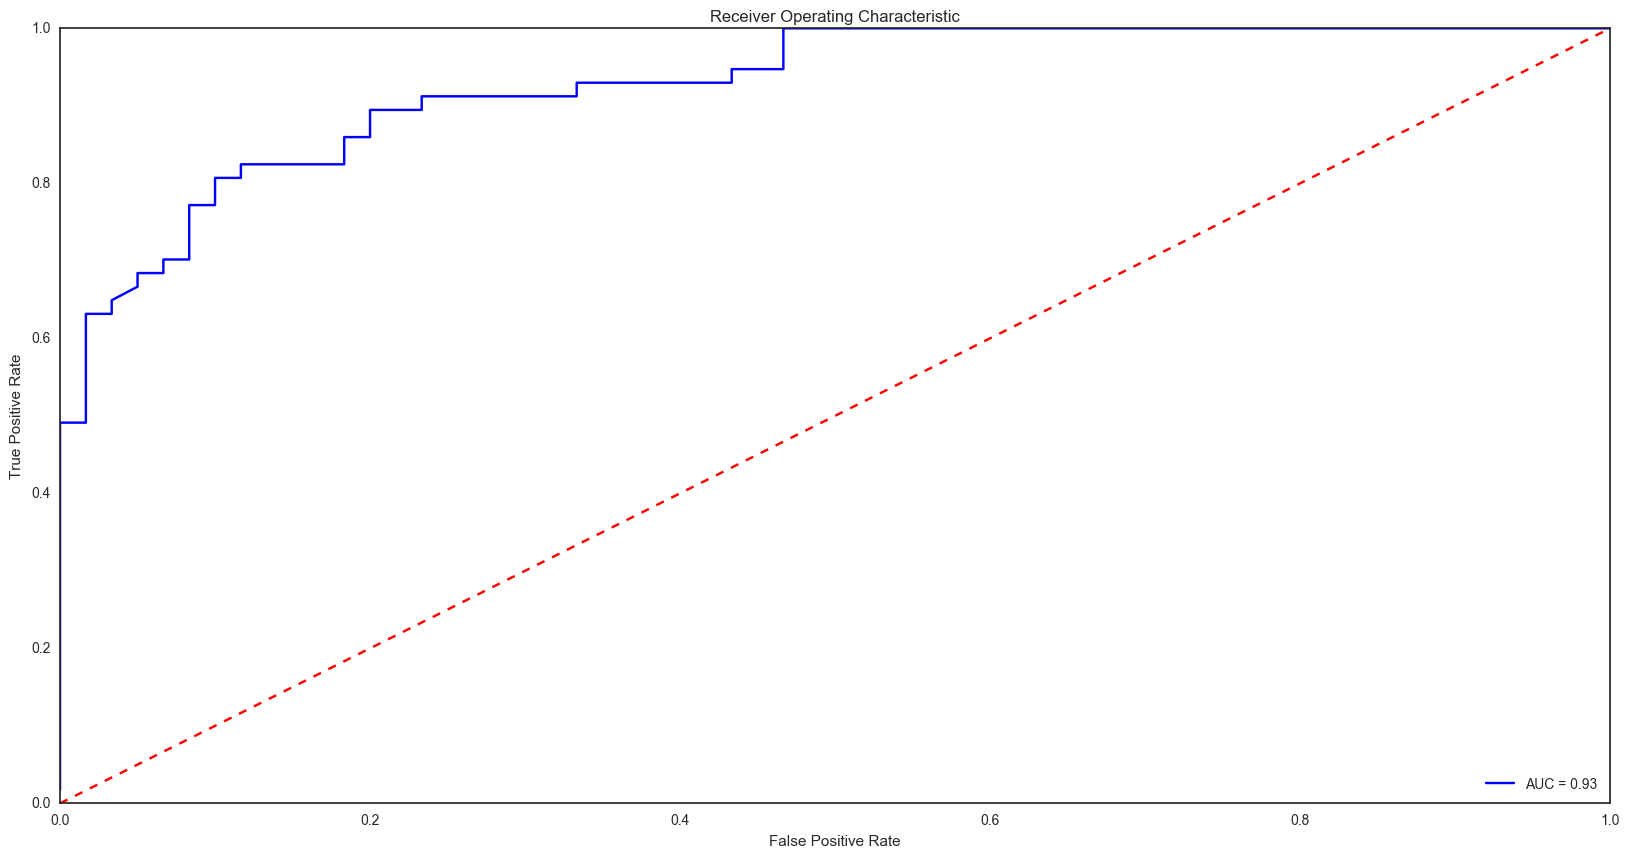

In [81]:

print(accuracy_score(Y_validation, pred_labels))
print(confusion_matrix(Y_validation, pred_labels))
print(classification_report(Y_validation, pred_labels))

# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(newdata_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
classifier.score(newdata_transformed, Y_validation)

0.82051282051282048

In [83]:
from sklearn.cross_validation import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GB
from sklearn.neighbors import KNeighborsClassifier as KNN

def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=10,shuffle=True)
    y_pred = y.copy()

    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred


def accuracy(y_true,y_pred):
    # NumPy interprets True and False as 1. and 0.
    return np.mean(y_true == y_pred)

print "Support vector machines:"
print "%.3f" % accuracy(Y_train, run_cv(X_train.values,Y_train.values,SVC))
print "Random forest:"
print "%.3f" % accuracy(Y_train, run_cv(X_train.values,Y_train.values,RF))
print "Gradient Boosting:"
print "%.3f" % accuracy(Y_train, run_cv(X_train.values,Y_train.values,GB))
print "K-nearest-neighbors:"
print "%.3f" % accuracy(Y_train, run_cv(X_train.values,Y_train.values,KNN))

Support vector machines:
0.581
Random forest:
0.782
Gradient Boosting:
0.782
K-nearest-neighbors:
0.793


In [84]:
Y_validation.shape

(117,)

# Removing Correlated Features

In [128]:
# load data
X = df_scaled_df
Y = df_clean_2["outcome"]


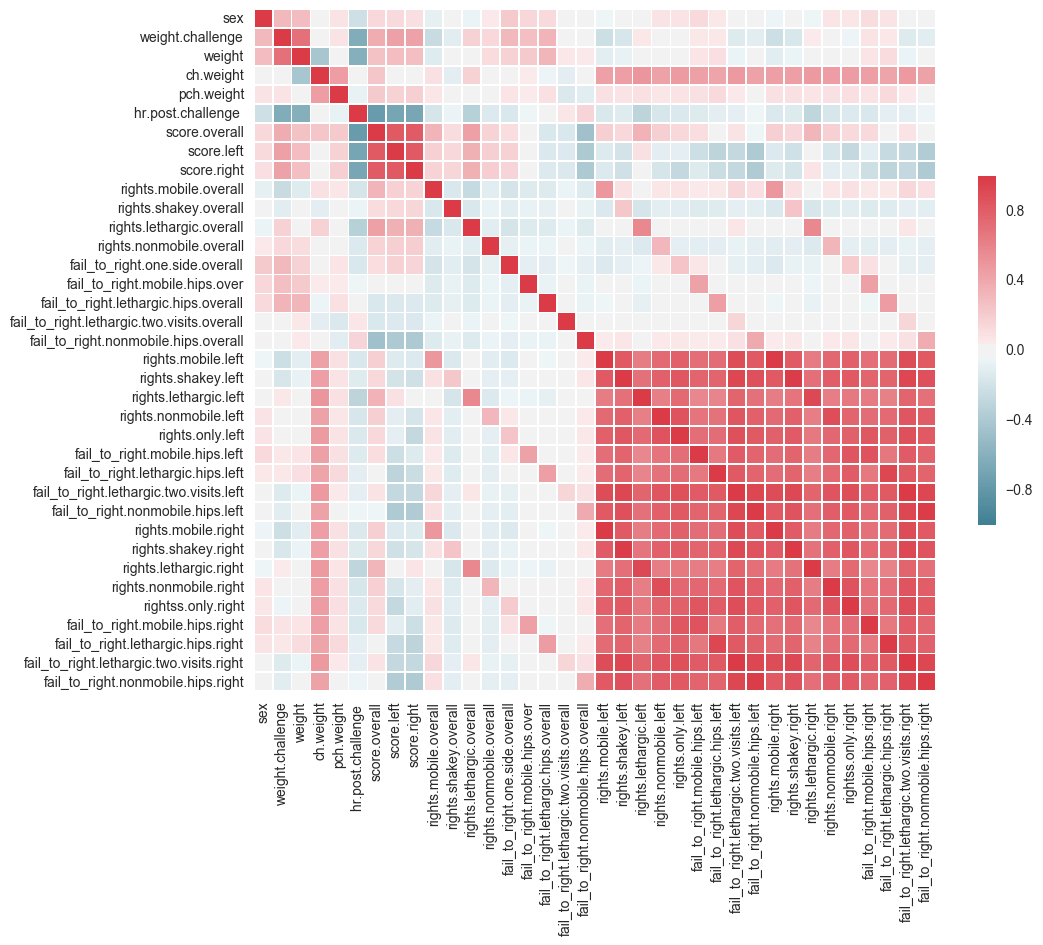

In [129]:
correlations = X.corr(method='pearson')


# Plot Correlations
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [130]:
X = X.drop(['rights.mobile.left','rights.shakey.left','rights.lethargic.left','rights.nonmobile.left','rights.only.left','fail_to_right.mobile.hips.left','fail_to_right.lethargic.hips.left','fail_to_right.lethargic.two.visits.left','fail_to_right.nonmobile.hips.left','rights.mobile.right','rights.shakey.right','rights.lethargic.right','rights.nonmobile.right','rightss.only.right','fail_to_right.mobile.hips.right','fail_to_right.lethargic.hips.right','fail_to_right.lethargic.two.visits.right','fail_to_right.nonmobile.hips.right'], axis=1)

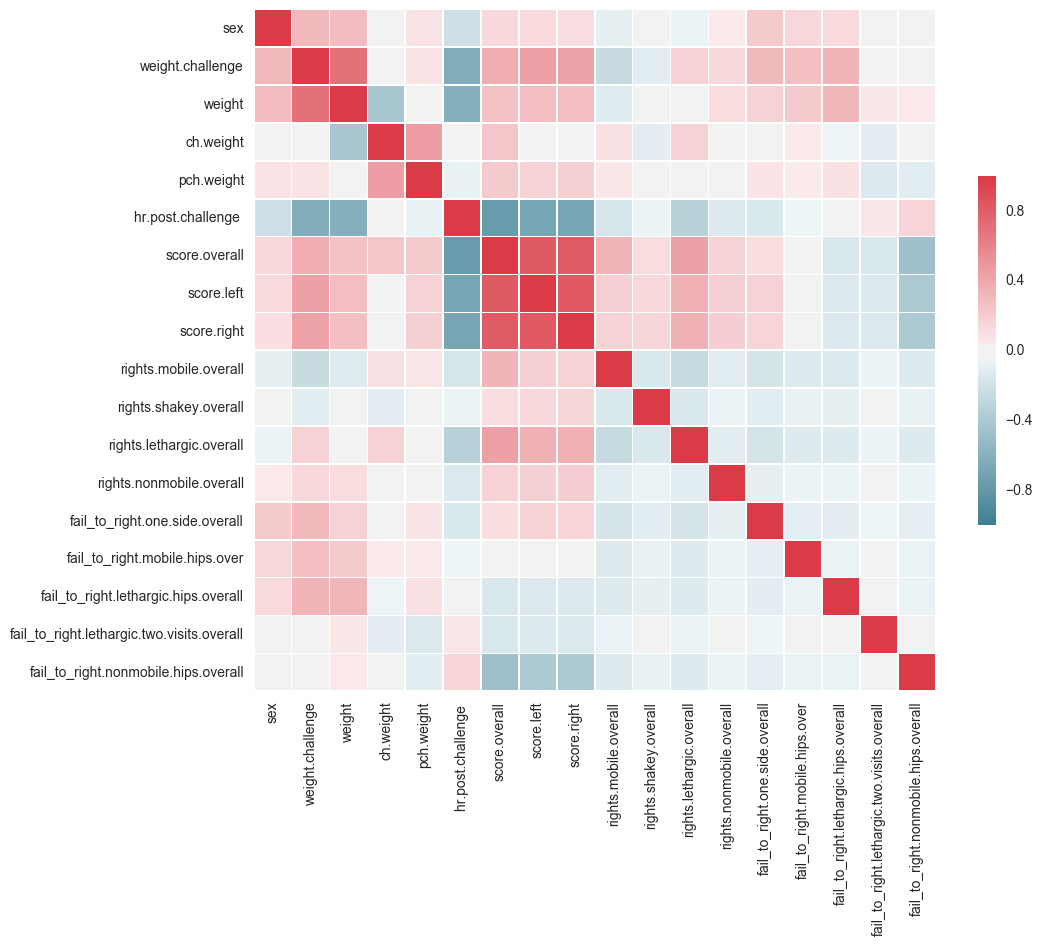

In [131]:
correlations = X.corr(method='pearson')


# Plot Correlations
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [132]:
X = X.drop(['score.left', 'score.right'], axis=1)
#X = X[["weight.challenge", "score.overall"]]

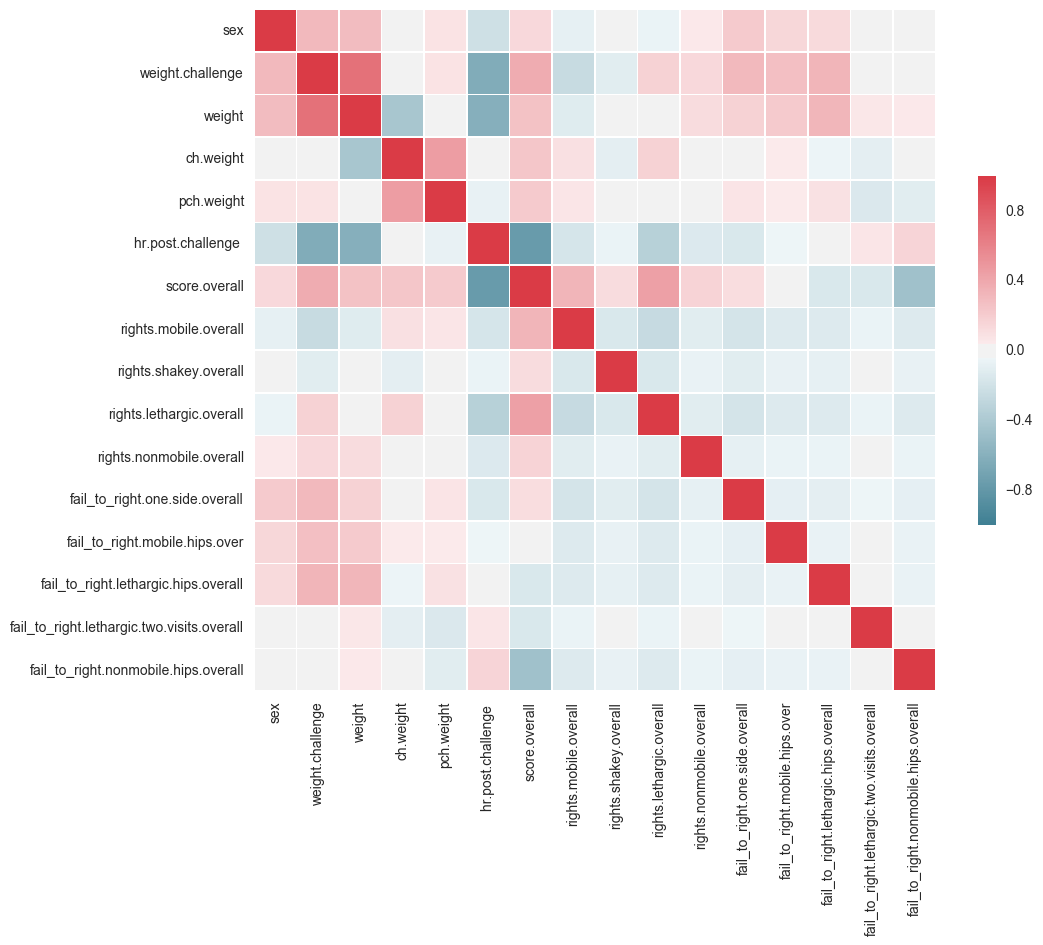

In [133]:
correlations = X.corr(method='pearson')


# Plot Correlations
corr = X.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = False
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#for tick in ax.get_xticklabels():
#    tick.set_rotation(90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Feature Selections

	Corr.	Linear reg	MIC	RF	RFE	Ridge	Mean
sex	0.06	0.05	0.67	0.15	0.27	0.07	0.11
weight.challenge	1.0	0.02	0.79	0.73	0.09	1.0	0.76
weight	0.4	0.0	0.78	0.23	0.0	0.5	0.32
ch.weight	0.0	0.27	0.78	0.43	0.36	0.16	0.32
pch.weight	0.31	0.04	0.59	0.51	0.18	0.57	0.41
hr.post.challenge 	0.07	0.21	0.64	0.34	0.73	0.26	0.3
score.overall	0.27	0.09	1.0	1.0	0.45	0.73	0.59
rights.mobile.overall	0.92	0.99	0.79	0.92	1.0	0.17	0.92
rights.shakey.overall	0.12	0.47	0.25	0.09	1.0	0.04	0.18
rights.lethargic.overall	0.0	0.19	0.42	0.2	0.91	0.0	0.2
rights.nonmobile.overall	0.01	0.08	0.12	0.04	0.82	0.02	0.06
fail_to_right.one.side.overall	0.24	0.34	0.35	0.11	0.55	0.14	0.29
fail_to_right.mobile.hips.over	0.02	0.08	0.17	0.1	0.64	0.01	0.09
fail_to_right.lethargic.hips.overall	0.47	0.68	0.22	0.04	1.0	0.15	0.34
fail_to_right.lethargic.two.visits.overall	0.11	1.0	0.0	0.0	1.0	0.02	0.07
fail_to_right.nonmobile.hips.overall	0.67	0.97	0.23	0.0	1.0	0.12	0.45


/Users/Rad/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:73: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


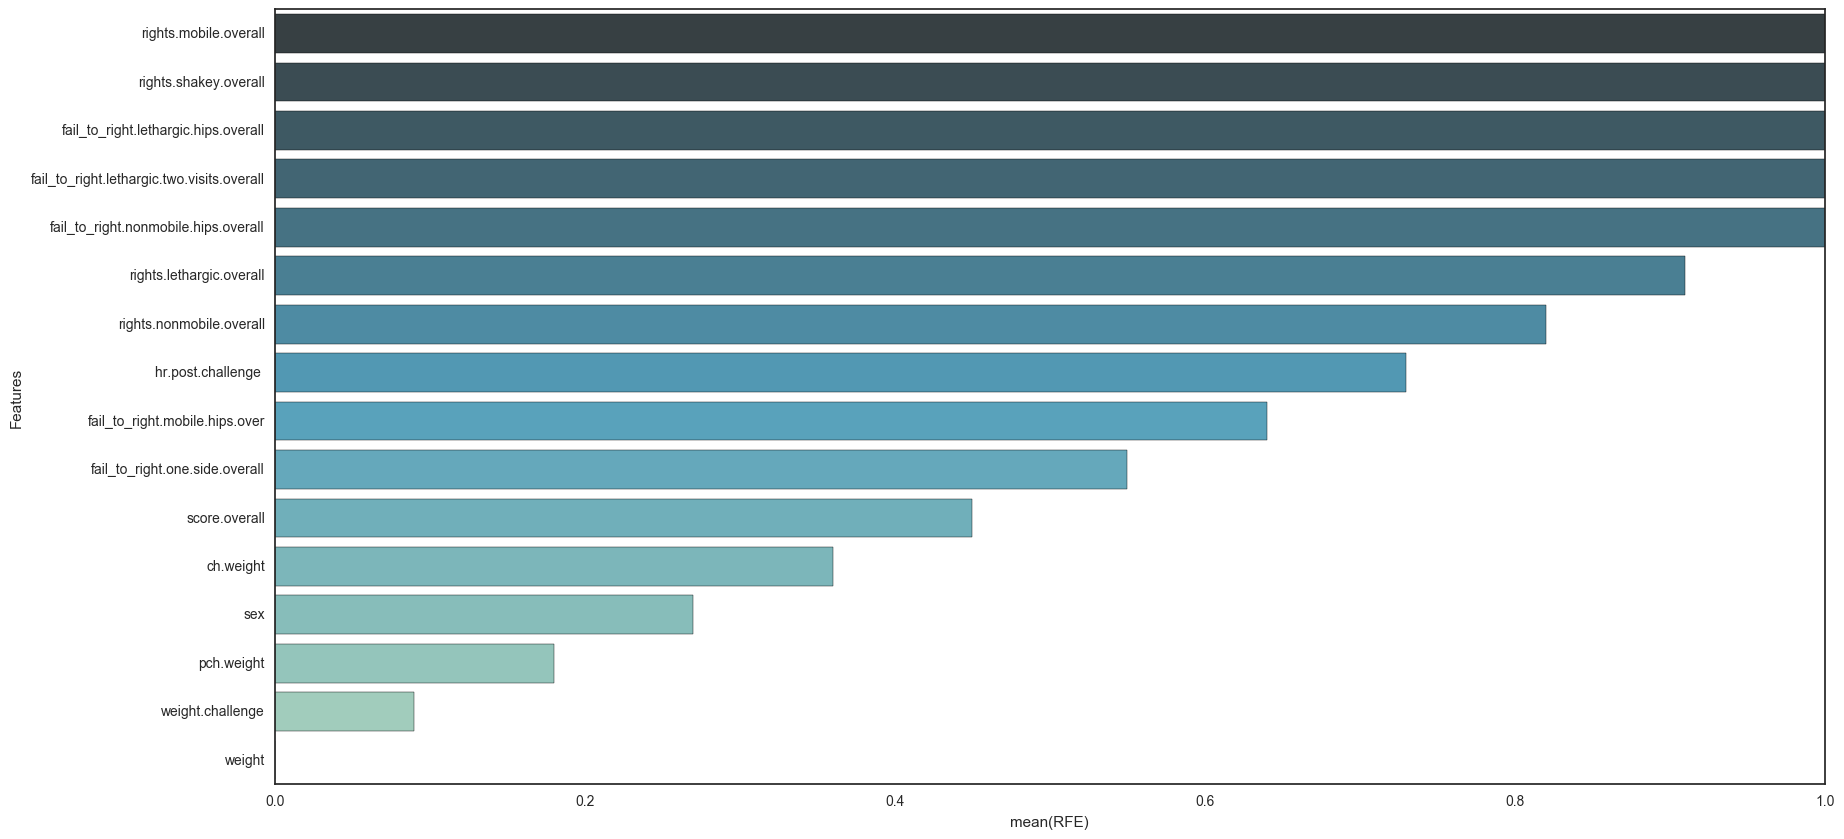

In [137]:
#names = X.columns
#X = X.values
#Y = Y.values

ranks = {}
 
def rank_to_dict(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x, 2), ranks)
    return dict(zip(names, ranks ))
 
lr = LinearRegression(normalize=True)
lr.fit(X, Y)
ranks["Linear reg"] = rank_to_dict(np.abs(lr.coef_), names)
 
ridge = Ridge(alpha=7)
ridge.fit(X, Y)
ranks["Ridge"] = rank_to_dict(np.abs(ridge.coef_), names)
 
#lasso = Lasso(alpha=.05)
#lasso.fit(X, Y)
#ranks["Lasso"] = rank_to_dict(np.abs(lasso.coef_), names)
 
#rlasso = RandomizedLasso(alpha=0.04)
#rlasso.fit(X, Y)
#ranks["Stability"] = rank_to_dict(np.abs(rlasso.scores_), names)
 
#stop the search when 5 features are left (they will get equal scores)
rfe = RFE(lr, n_features_to_select=5)
rfe.fit(X,Y)
ranks["RFE"] = rank_to_dict(map(float, rfe.ranking_), names, order=-1)
 
rf = RandomForestRegressor()
rf.fit(X,Y)
ranks["RF"] = rank_to_dict(rf.feature_importances_, names)
 
f, pval  = f_regression(X, Y, center=True)
ranks["Corr."] = rank_to_dict(f, names)
 
mine = MINE()
mic_scores = []
for i in range(X.shape[1]):
    mine.compute_score(X[:,i], Y)
    m = mine.mic()
    mic_scores.append(m)

ranks["MIC"] = rank_to_dict(mic_scores, names) 
 
r = {}
for name in names:
    r[name] = round(np.median([ranks[method][name] 
                             for method in ranks.keys()]), 2)

methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print "\t%s" % "\t".join(methods)
for name in names:
    print "%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods])))


results_FS = pd.DataFrame(columns=methods)
for name in names:
    results_FS.loc[name] = map(float, [ranks[method][name] for method in methods])

results_FS['Features'] = results_FS.index
results_FS.reset_index(level=0, inplace=True)
results_FS.head()
results_FS = results_FS.drop(['index'], axis=1)
ax = sns.barplot(y="Features", x="RFE", data=results_FS.sort(['RFE'], ascending=False), orient='h', palette="GnBu_d")

LR: 0.674792 (0.078386)
LDA: 0.739177 (0.058447)
KNN: 0.811933 (0.056783)
CART: 0.758511 (0.055869)
NB: 0.694403 (0.046958)
SVM: 0.581082 (0.047989)


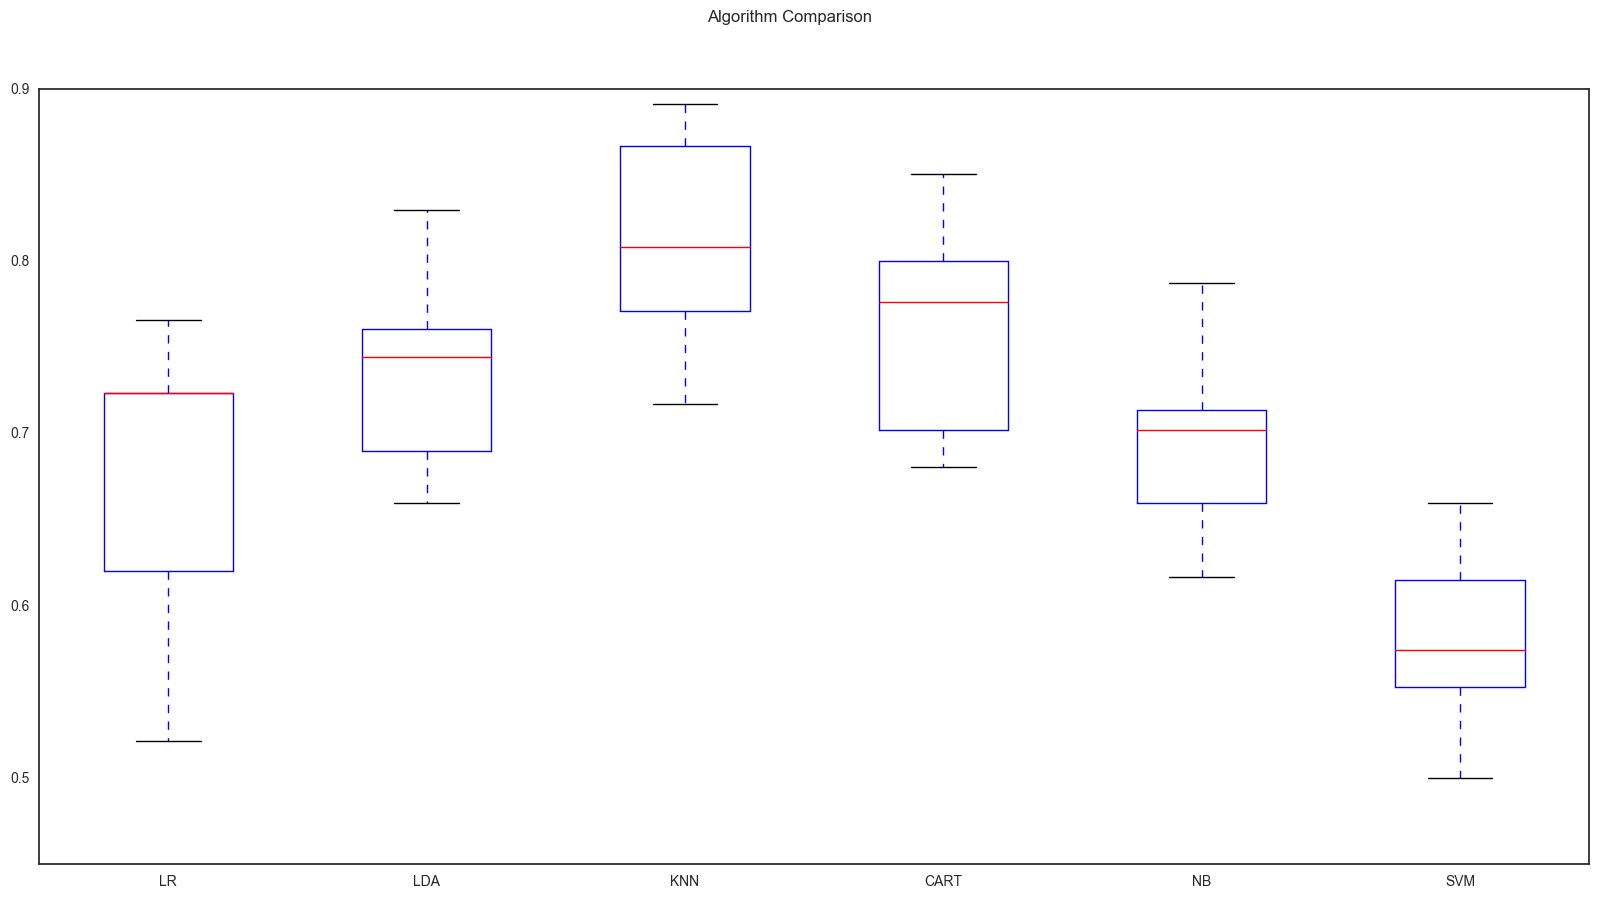

AB: 0.773312 (0.065625)
GBM: 0.799075 (0.055396)
RF: 0.786170 (0.044438)
ET: 0.782100 (0.055551)
XGB: 0.803191 (0.060583)


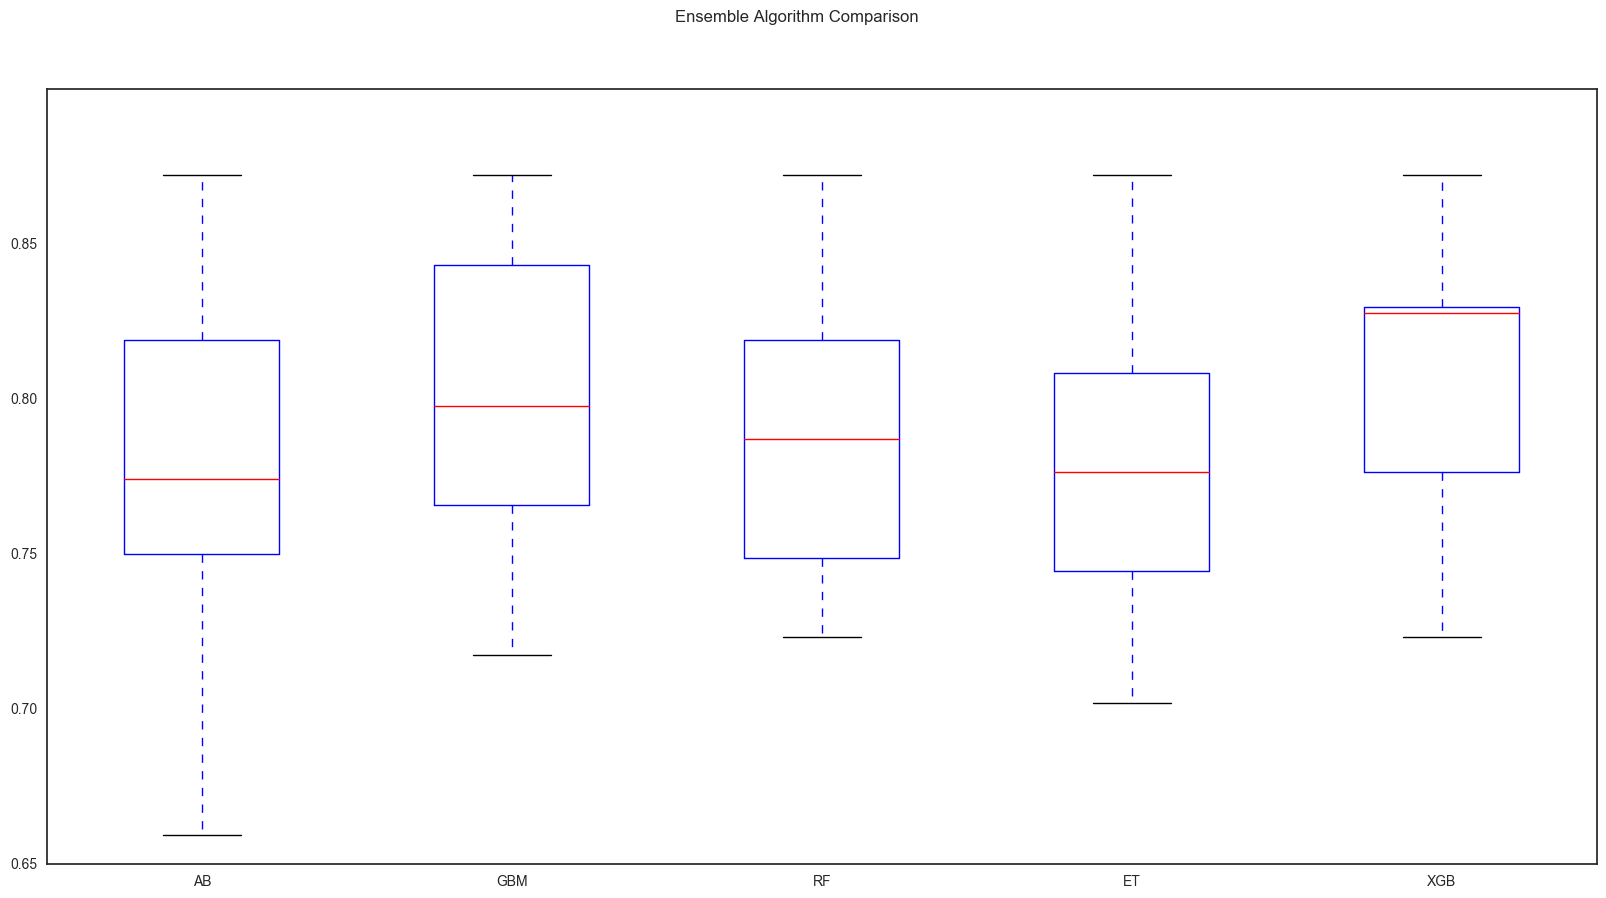

In [138]:
# Load libraries
import pandas
import numpy
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost
# Validation dataset

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)


# Baseline

# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'

# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
ensembles.append(('XGB', xgboost.XGBClassifier()))

results = []
names = []
for name, model in ensembles:
    kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold,
    scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()



0.863247863248
[[53  7]
 [ 9 48]]
             precision    recall  f1-score   support

        0.0       0.85      0.88      0.87        60
        1.0       0.87      0.84      0.86        57

avg / total       0.86      0.86      0.86       117



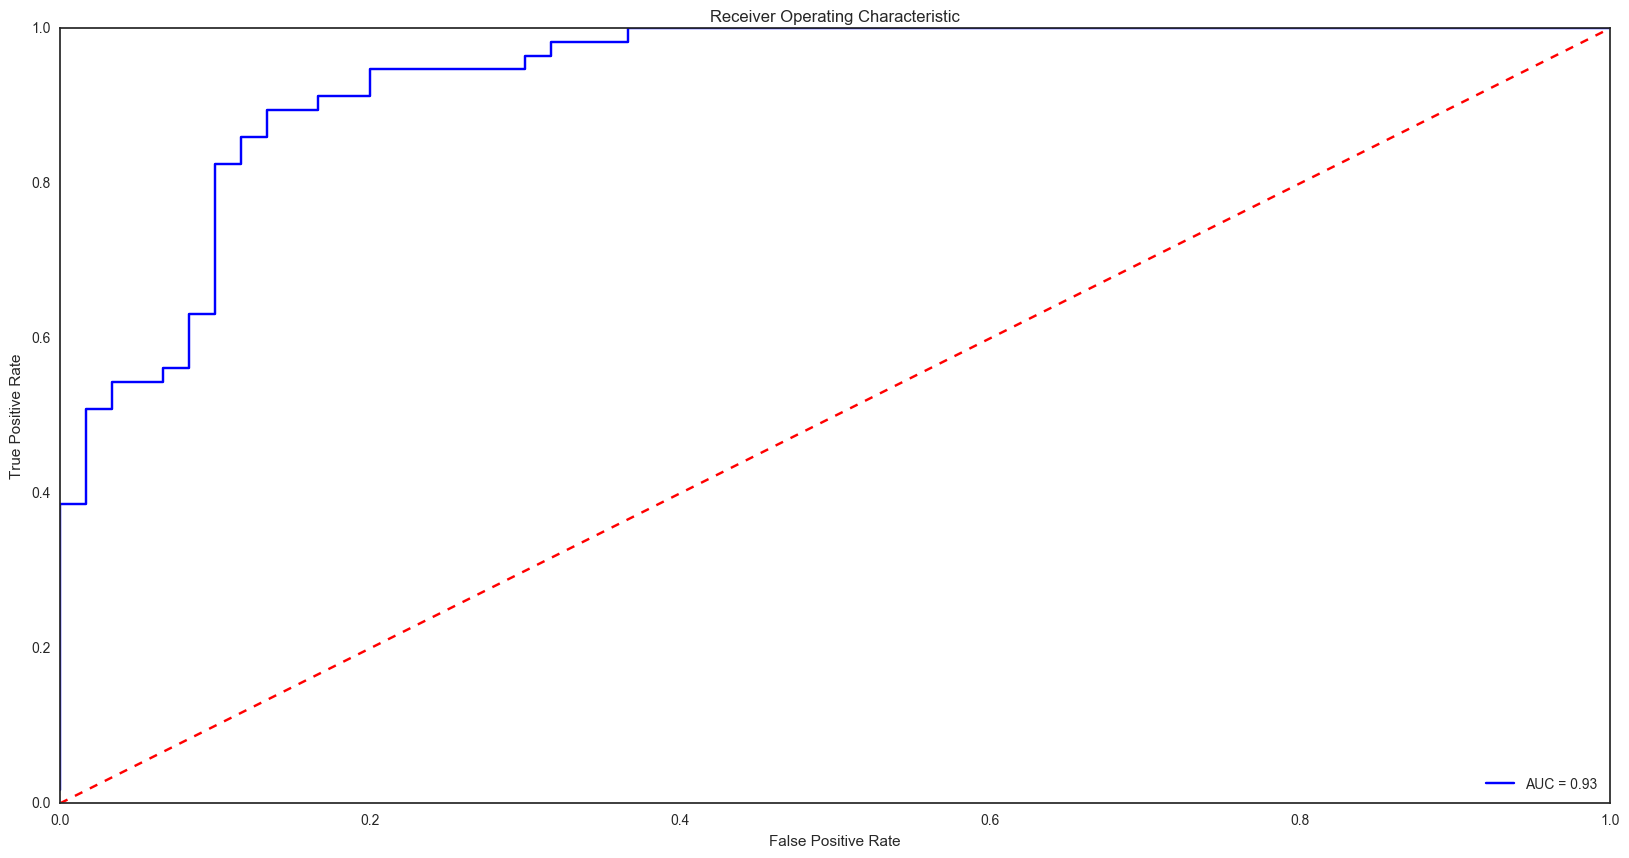

In [141]:
# prepare the model
#scaler = StandardScaler().fit(X_train)
#rescaledX = scaler.transform(X_train)
model = xgboost.XGBClassifier()
model.fit(X_train, Y_train)
# estimate accuracy on validation dataset
#rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(X_validation)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Using PCA with XGBOOST

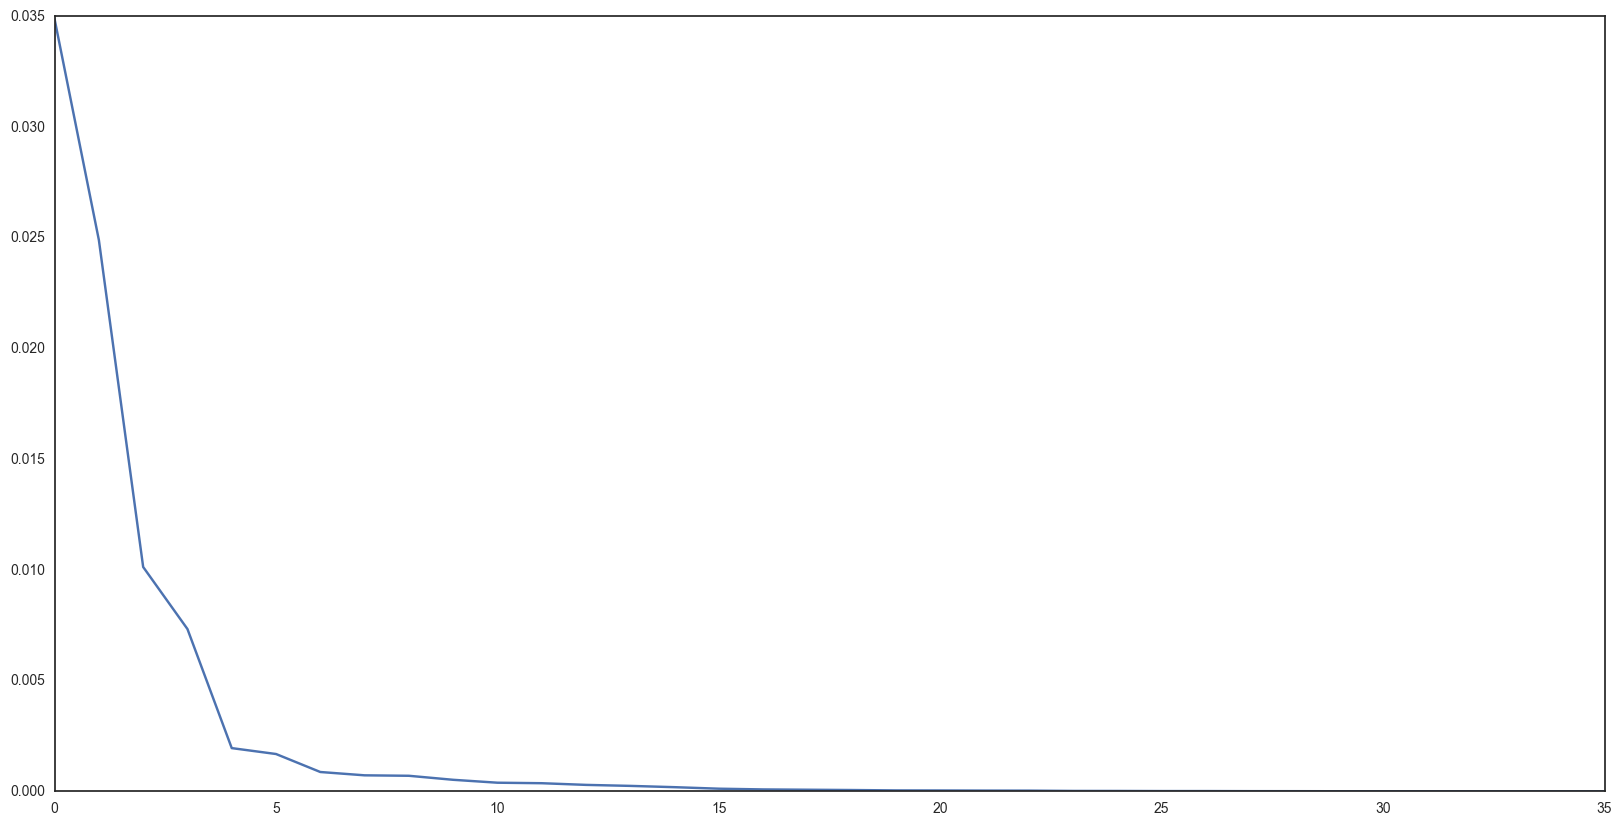

In [114]:
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

# load data
X = df_scaled_df
Y = df_clean_2["outcome"]

validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,test_size=validation_size, random_state=seed)

pca = PCA(n_components=36)

pca.fit(X_train)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#plt.plot(var1)
plt.plot(pca.explained_variance_)

0.820512820513
[[50 10]
 [11 46]]
             precision    recall  f1-score   support

        0.0       0.82      0.83      0.83        60
        1.0       0.82      0.81      0.81        57

avg / total       0.82      0.82      0.82       117



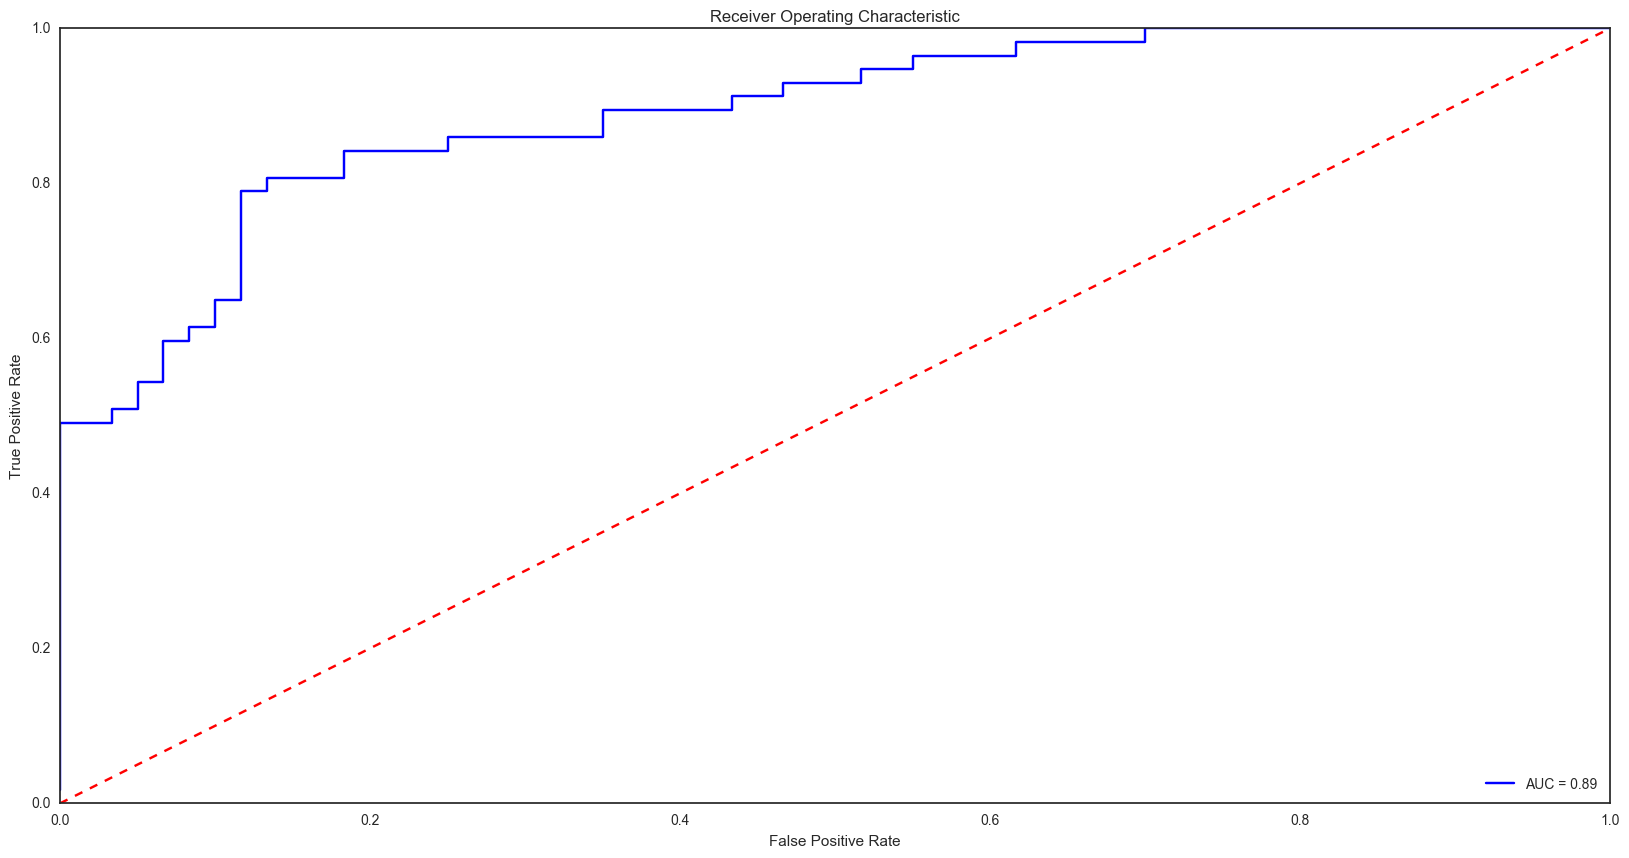

In [118]:
# initiate PCA and classifier
pca = PCA(n_components=4)
classifier = xgboost.XGBClassifier(n_estimators=1000)

#regularization 

#param_grid = {
#                 'n_estimators': [5, 10, 15, 20, 100, 200, 300],
#                 'max_depth': [2, 5, 7, 9, 50]
#             }

#grid_clf = GridSearchCV(classifier, param_grid, cv=10)

# transform / fit
#pca.fit(X_train)
X_transformed = pca.fit_transform(X_train)

#scores = cross_val_score(classifier, X_transformed, Y_train, cv = 10, scoring='precision')
classifier.fit(X_transformed, Y_train)

# predict "new" data
# (I'm faking it here by using the original data)

newdata = X_validation

# transform new data using already fitted pca
# (don't re-fit the pca)
newdata_transformed = pca.transform(newdata)

# predict labels using the trained classifier

pred_labels = classifier.predict(newdata_transformed)

#-----------------

explained_var =  pd.DataFrame(pca.components_.T,index=X_train.columns,columns= ['PC-1','PC-2', 'PC-3', 'PC-4'])

explained_var.to_csv("explained_variance.csv", index=True, header=True, sep="\t")

#------------

print(accuracy_score(Y_validation, pred_labels))
print(confusion_matrix(Y_validation, pred_labels))
print(classification_report(Y_validation, pred_labels))

# calculate the fpr and tpr for all thresholds of the classification
probs = classifier.predict_proba(newdata_transformed)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(Y_validation, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




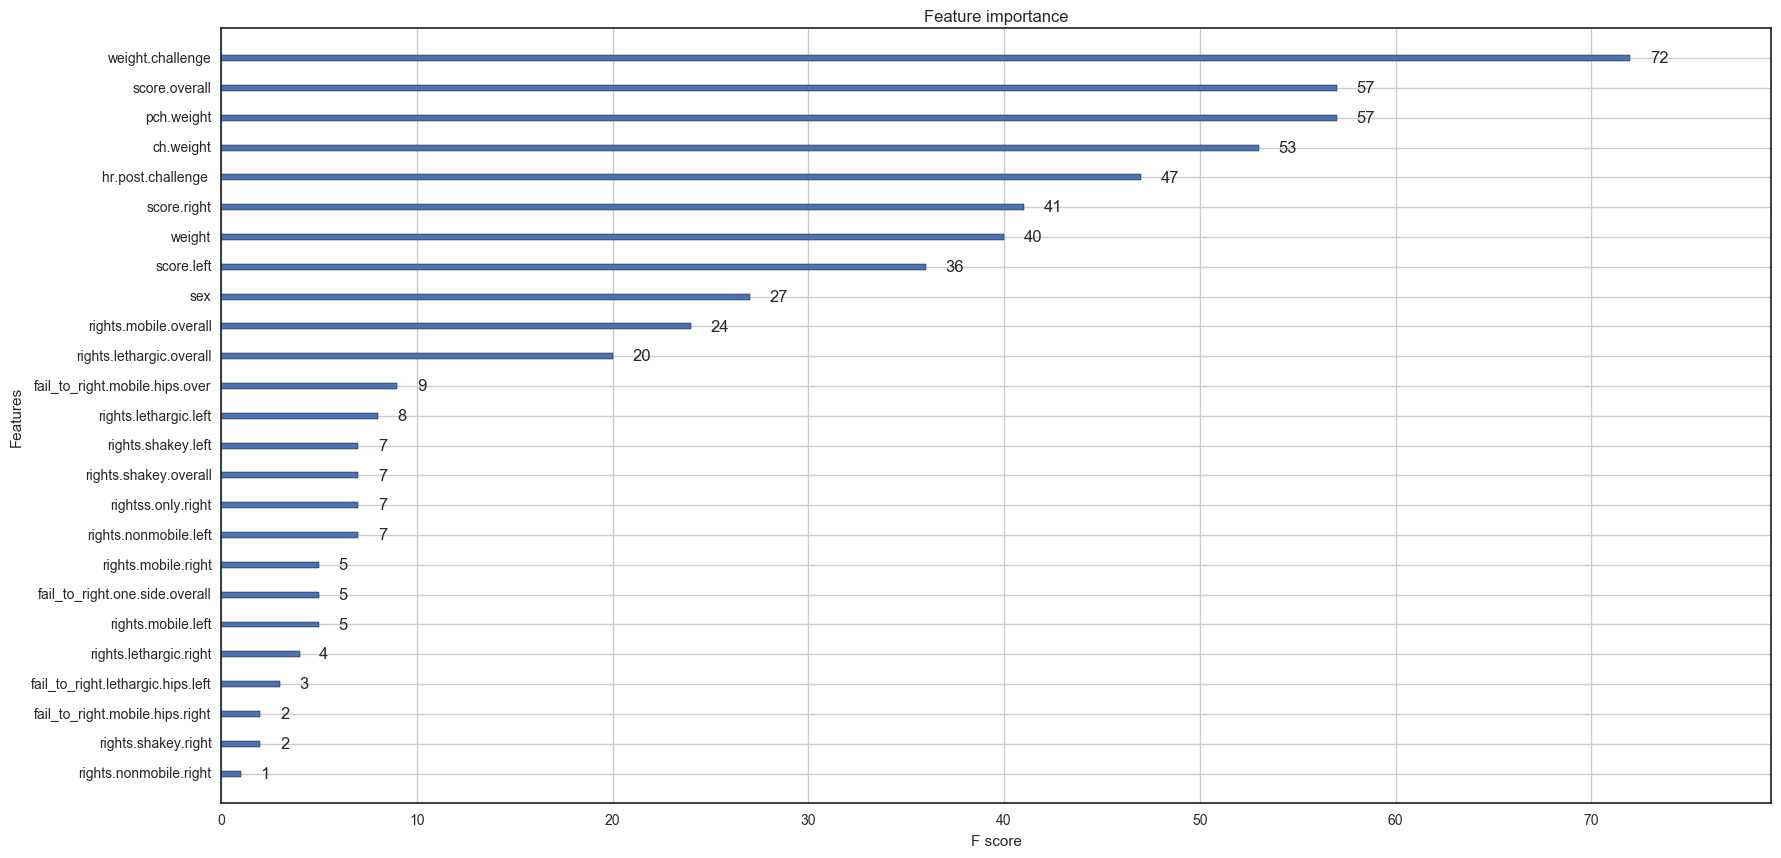

In [103]:
from xgboost import plot_importance
from matplotlib import pyplot
# split data into X and y
X = df_scaled_df
Y = df_clean_2["outcome"]
# fit model no training data
model2 = xgboost.XGBClassifier()
model2.fit(X, Y)
# plot feature importance
plot_importance(model2)
pyplot.show()